In [13]:
library(ggpubr)
library(ggplot2)
library(RColorBrewer)
library('ggrepel')
library("RColorBrewer")
library(dplyr)
library(tidyr)
library(tibble)
library(VennDiagram)
library(gplots)
library(pheatmap)
library("Hmisc")

In [4]:
###==================for stacked bar plot of shared gene and TE families in three genotypes======================###

In [3]:
gassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/B73-W22-Mo17-1-1-1.txt",sep='\t',head=T)
tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73-W22-Mo17-TEfamily-association.txt",sep='\t',head=T)
# only looking for genes or TE families that present in all three genotypes
gene = gassoc %>% drop_na()
te = tassoc %>% drop_na()

B73coldgene = read.table("DEvalue/B73-DE-Gene-expressed-cold-Aug.txt",sep=' ',head=T)
B73heatgene = read.table("DEvalue/B73-DE-Gene-expressed-heat-Aug.txt",sep=' ',head=T)
B73coldte = read.table("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
B73heatte = read.table("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)

W22coldgene = read.table("DEvalue/W22-DE-Gene-expressed-cold-Aug.txt",sep=' ',head=T)
W22heatgene = read.table("DEvalue/W22-DE-Gene-expressed-heat-Aug.txt",sep=' ',head=T)
W22coldte = read.table("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
W22heatte = read.table("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)

Mo17coldgene = read.table("DEvalue/Mo17-DE-Gene-expressed-cold-Aug.txt",sep=' ',head=T)
Mo17heatgene = read.table("DEvalue/Mo17-DE-Gene-expressed-heat-Aug.txt",sep=' ',head=T)
Mo17coldte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
Mo17heatte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)

head(gene)
head(te)

,B73,W22,Mo17
,<fct>,<fct>,<fct>
1,Zm00001d001763,Zm00004b005869,Zm00014a026328
2,Zm00001d001765,Zm00004b005870,Zm00014a026331
3,Zm00001d001766,Zm00004b005871,Zm00014a026332
4,Zm00001d001767,Zm00004b005872,Zm00014a044144
5,Zm00001d001769,Zm00004b005873,Zm00014a044143
6,Zm00001d001771,Zm00004b005874,Zm00014a043260


,TE,B73,W22,Mo17
,<fct>,<fct>,<fct>,<fct>
1,DHH00001,B73,W22,Mo17
2,DHH00002,B73,W22,Mo17
3,DHH00003,B73,W22,Mo17
4,DHH00004,B73,W22,Mo17
5,DHH00005,B73,W22,Mo17
6,DHH00006,B73,W22,Mo17


In [4]:
### B73 cold
B73upcoldgene = B73coldgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% gene$B73) %>% pull(Feature)
B73downcoldgene = B73coldgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% gene$B73) %>% pull(Feature)
B73upcoldte = B73coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
B73downcoldte = B73coldte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
### B73 heat
B73upheatgene = B73heatgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% gene$B73) %>% pull(Feature)
B73downheatgene = B73heatgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% gene$B73) %>% pull(Feature)
B73upheatte = B73heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
B73downheatte = B73heatte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
### using B73 gene and TE family ID for both W22 and Mo17
wug = W22coldgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
wdg = W22coldgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% pull(Feature)
W22upcoldgene = gene %>% filter(W22 %in% wug) %>% pull(B73)
W22downcoldgene = gene %>% filter(W22 %in% wdg) %>% pull(B73)
W22upcoldte = W22coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
W22downcoldte = W22coldte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
###
wug = W22heatgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
wdg = W22heatgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% pull(Feature)
W22upheatgene = gene %>% filter(W22 %in% wug) %>% pull(B73)
W22downheatgene = gene %>% filter(W22 %in% wdg) %>% pull(B73)
W22upheatte = W22heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
W22downheatte = W22heatte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
###
mug = Mo17coldgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
mdg = Mo17coldgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% pull(Feature)
Mo17upcoldgene = gene %>% filter(Mo17 %in% mug) %>% pull(B73)
Mo17downcoldgene = gene %>% filter(Mo17 %in% mdg) %>% pull(B73)
Mo17upcoldte = Mo17coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
Mo17downcoldte = Mo17coldte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
###
mug = Mo17heatgene %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
mdg = Mo17heatgene %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% pull(Feature)
Mo17upheatgene = gene %>% filter(Mo17 %in% mug) %>% pull(B73)
Mo17downheatgene = gene %>% filter(Mo17 %in% mdg) %>% pull(B73)
Mo17upheatte = Mo17heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)
Mo17downheatte = Mo17heatte %>% filter(log2FoldChange < -1 & padj <= 0.05) %>% filter(Feature %in% te$TE) %>% pull(Feature)

In [5]:
coldupgene = list(B73=B73upcoldgene, W22=W22upcoldgene, Mo17=Mo17upcoldgene)
output = venn(data=coldupgene,show.plot = FALSE)
print ("Up gene in cold")
output[,c(1,2,3,4)]
Gupcold = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
heatupgene = list(B73=B73upheatgene, W22=W22upheatgene, Mo17=Mo17upheatgene)
output = venn(data=heatupgene,show.plot = FALSE)
print ("Up gene in heat")
output[,c(1,2,3,4)]
Gupheat = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
###
colddowngene = list(B73=B73downcoldgene, W22=W22downcoldgene, Mo17=Mo17downcoldgene)
output = venn(data=colddowngene,show.plot = FALSE)
print ("Down gene in cold")
output[,c(1,2,3,4)]
Gdowncold = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
heatdowngene = list(B73=B73downheatgene, W22=W22downheatgene, Mo17=Mo17downheatgene)
output = venn(data=heatdowngene,show.plot = FALSE)
print ("Down gene in heat")
output[,c(1,2,3,4)]
Gdownheat = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
###
coldupte = list(B73=B73upcoldte, W22=W22upcoldte, Mo17=Mo17upcoldte)
output = venn(data=coldupte,show.plot = FALSE)
print ("Up te in cold")
output[,c(1,2,3,4)]
Tupcold = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
heatupte = list(B73=B73upheatte, W22=W22upheatte, Mo17=Mo17upheatte)
print ("Up te in heat")
output = venn(data=heatupte,show.plot = FALSE)
output[,c(1,2,3,4)]
Tupheat = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
###
colddownte = list(B73=B73downcoldte, W22=W22downcoldte, Mo17=Mo17downcoldte)
output = venn(data=colddownte,show.plot = FALSE)
print ("Down te in cold")
output[,c(1,2,3,4)]
Tdowncold = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])
heatdownte = list(B73=B73downheatte, W22=W22downheatte, Mo17=Mo17downheatte)
output = venn(data=heatdownte,show.plot = FALSE)
print ("Down te in heat")
output[,c(1,2,3,4)]
Tdownheat = c(output[,1][5],output[,1][3],output[,1][2],output[,1][7],output[,1][6],output[,1][4],output[,1][8])

[1] "Up gene in cold"


,num,B73,W22,Mo17
000,0,0,0,0
001,571,0,0,1
010,554,0,1,0
011,233,0,1,1
100,599,1,0,0
101,416,1,0,1
110,197,1,1,0
111,722,1,1,1


[1] "Up gene in heat"


,num,B73,W22,Mo17
000,0,0,0,0
001,1013,0,0,1
010,709,0,1,0
011,494,0,1,1
100,727,1,0,0
101,506,1,0,1
110,403,1,1,0
111,1690,1,1,1


[1] "Down gene in cold"


,num,B73,W22,Mo17
000,0,0,0,0
001,542,0,0,1
010,955,0,1,0
011,391,0,1,1
100,457,1,0,0
101,317,1,0,1
110,227,1,1,0
111,809,1,1,1


[1] "Down gene in heat"


,num,B73,W22,Mo17
000,0,0,0,0
001,863,0,0,1
010,964,0,1,0
011,611,0,1,1
100,594,1,0,0
101,470,1,0,1
110,410,1,1,0
111,1438,1,1,1


[1] "Up te in cold"


,num,B73,W22,Mo17
000,0,0,0,0
001,66,0,0,1
010,49,0,1,0
011,10,0,1,1
100,60,1,0,0
101,4,1,0,1
110,14,1,1,0
111,10,1,1,1


[1] "Up te in heat"


,num,B73,W22,Mo17
000,0,0,0,0
001,134,0,0,1
010,129,0,1,0
011,45,0,1,1
100,71,1,0,0
101,23,1,0,1
110,27,1,1,0
111,48,1,1,1


[1] "Down te in cold"


,num,B73,W22,Mo17
000,0,0,0,0
001,72,0,0,1
010,70,0,1,0
011,18,0,1,1
100,41,1,0,0
101,6,1,0,1
110,6,1,1,0
111,7,1,1,1


[1] "Down te in heat"


,num,B73,W22,Mo17
000,0,0,0,0
001,122,0,0,1
010,91,0,1,0
011,26,0,1,1
100,59,1,0,0
101,14,1,0,1
110,10,1,1,0
111,11,1,1,1


In [6]:
# example showing the order of overlapped set for cross-genotype
output[,1][5]
output[,1][3]
output[,1][2]
output[,1][7]
output[,1][6]
output[,1][4]
output[,1][8]

100 
 59

010 
 91

001 
122

110 
 10

101 
 14

011 
 26

111 
 11

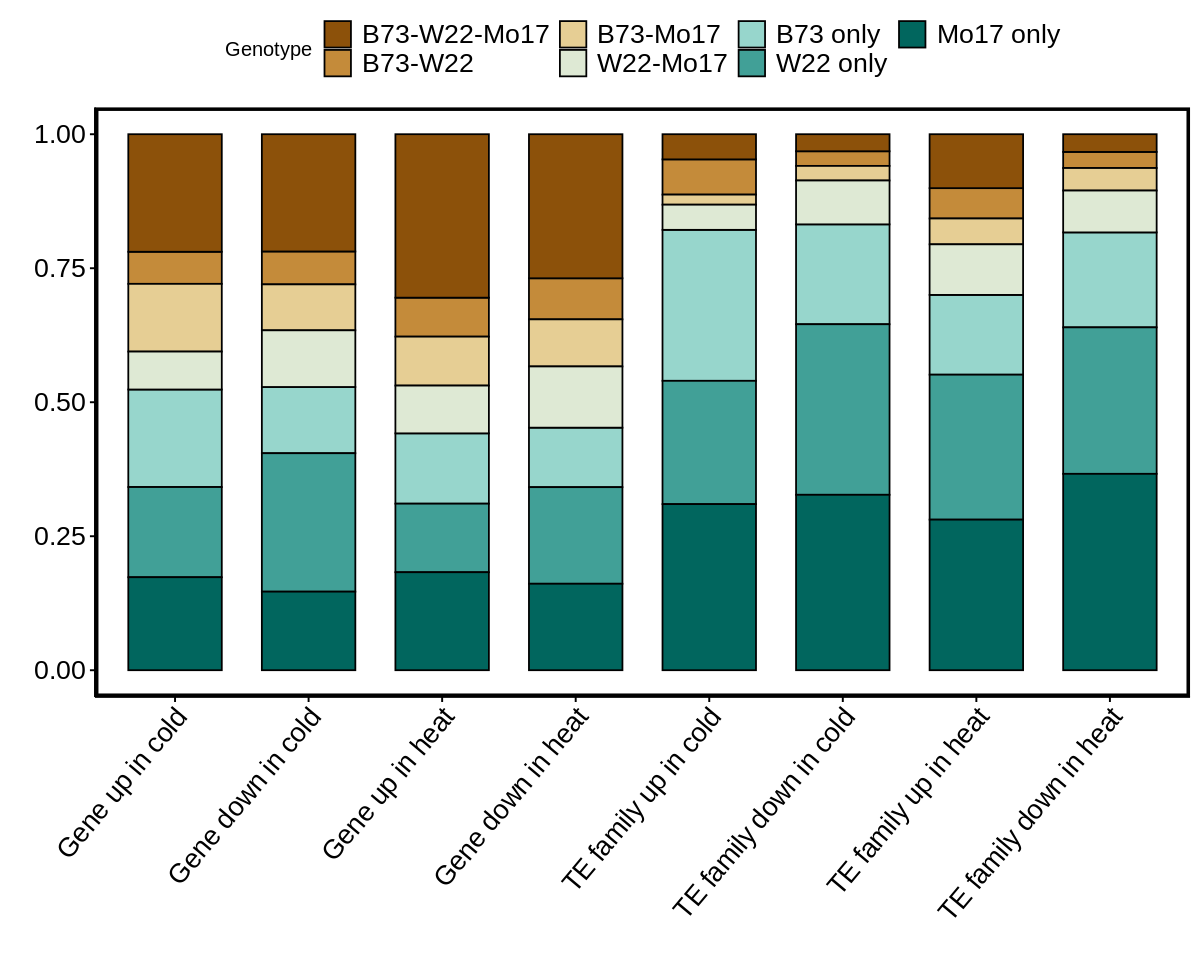

In [7]:
k = data.frame(Gupcold, Gdowncold, Tupcold, Tdowncold, Gupheat, Gdownheat, Tupheat, Tdownheat)
rownames(k) = c("B73 only","W22 only","Mo17 only","B73-W22","B73-Mo17","W22-Mo17","B73-W22-Mo17")
xdata = k %>% rownames_to_column(var="Genotype") %>%
        gather(Gupcold, Gdowncold, Tupcold, Tdowncold, Gupheat, Gdownheat, Tupheat, Tdownheat, key="Condition", value="Number")
colMain = colorRampPalette(brewer.pal(8, "BrBG"))(7)
newdata = k %>% rownames_to_column(var="Genotype") %>%
        gather(Gupcold, Gdowncold, Tupcold, Tdowncold, Gupheat, Gdownheat, Tupheat, Tdownheat, key="Condition", value="Number") %>%
        group_by(Condition) %>% mutate(Prop=as.numeric(Number)/sum(as.numeric(Number))) %>% ungroup()
newdata$Condition = factor(newdata$Condition, levels=c("Gupcold","Gdowncold","Gupheat","Gdownheat","Tupcold","Tdowncold","Tupheat","Tdownheat"))
newdata$Genotype = factor(newdata$Genotype, levels=c("B73-W22-Mo17", "B73-W22","B73-Mo17","W22-Mo17","B73 only","W22 only","Mo17 only"))
options(repr.plot.width=10, repr.plot.height=8)
mlabs = c("Gene up in cold","Gene down in cold","Gene up in heat","Gene down in heat",
          "TE family up in cold","TE family down in cold","TE family up in heat","TE family down in heat")
#svg("ColdHeat-GeneTE-overlap-proportion.svg")
ggbarplot(newdata, "Condition", "Prop",
  fill = "Genotype", palette=colMain, font.label = list(size = 50)) + xlab("") + ylab("") + 
  theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1))+
    font("xy.text", size = 16, color = "black", family="liberation sans") +
    font("legend.text", color = "black", size=16, family="liberation sans") + scale_x_discrete(labels= mlabs)
#dev.off()
#=====================This is the end for stack bar plot==========================================#

In [53]:
#=====================Start for Venn Diagram for overlapped upregulated TE elements in cold and heat==========#

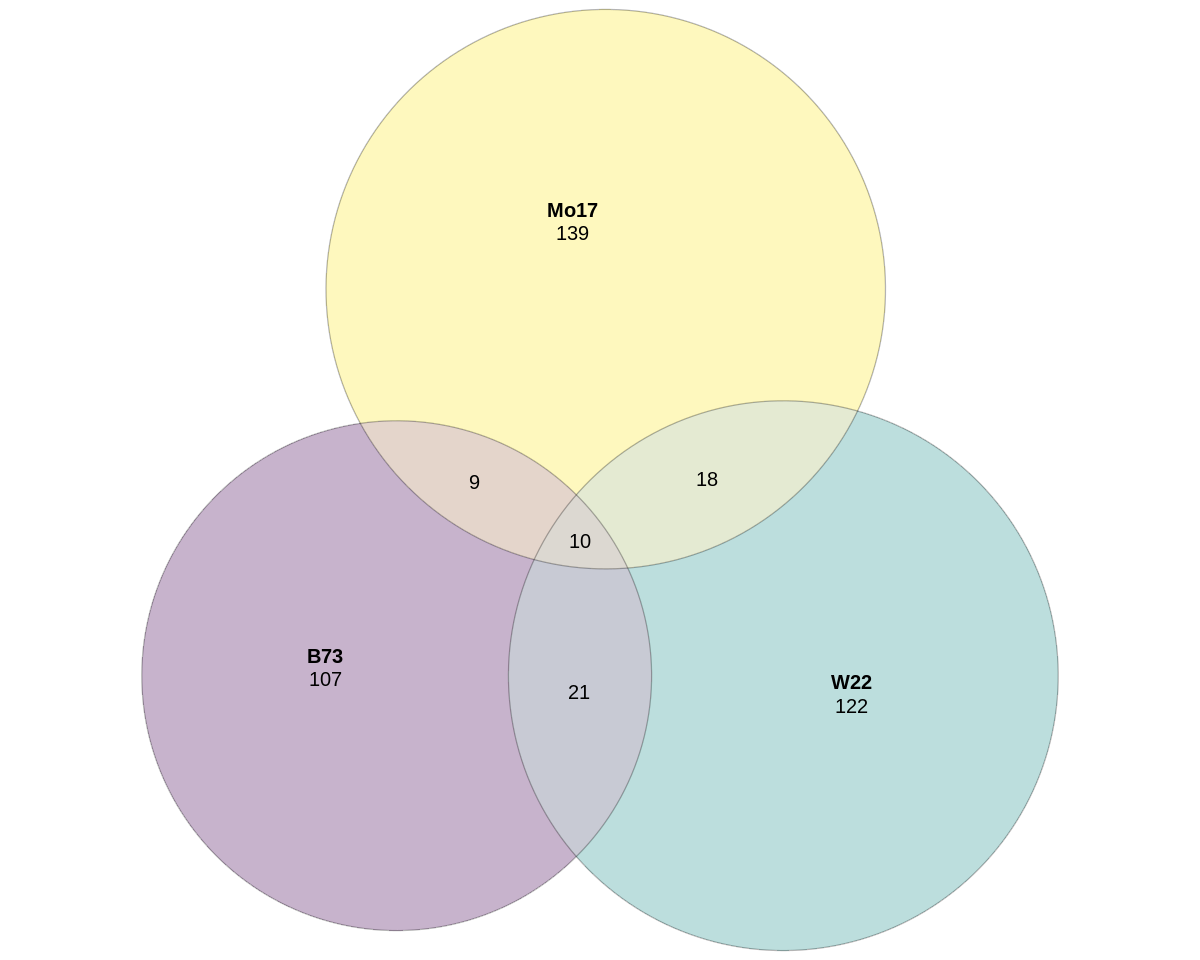

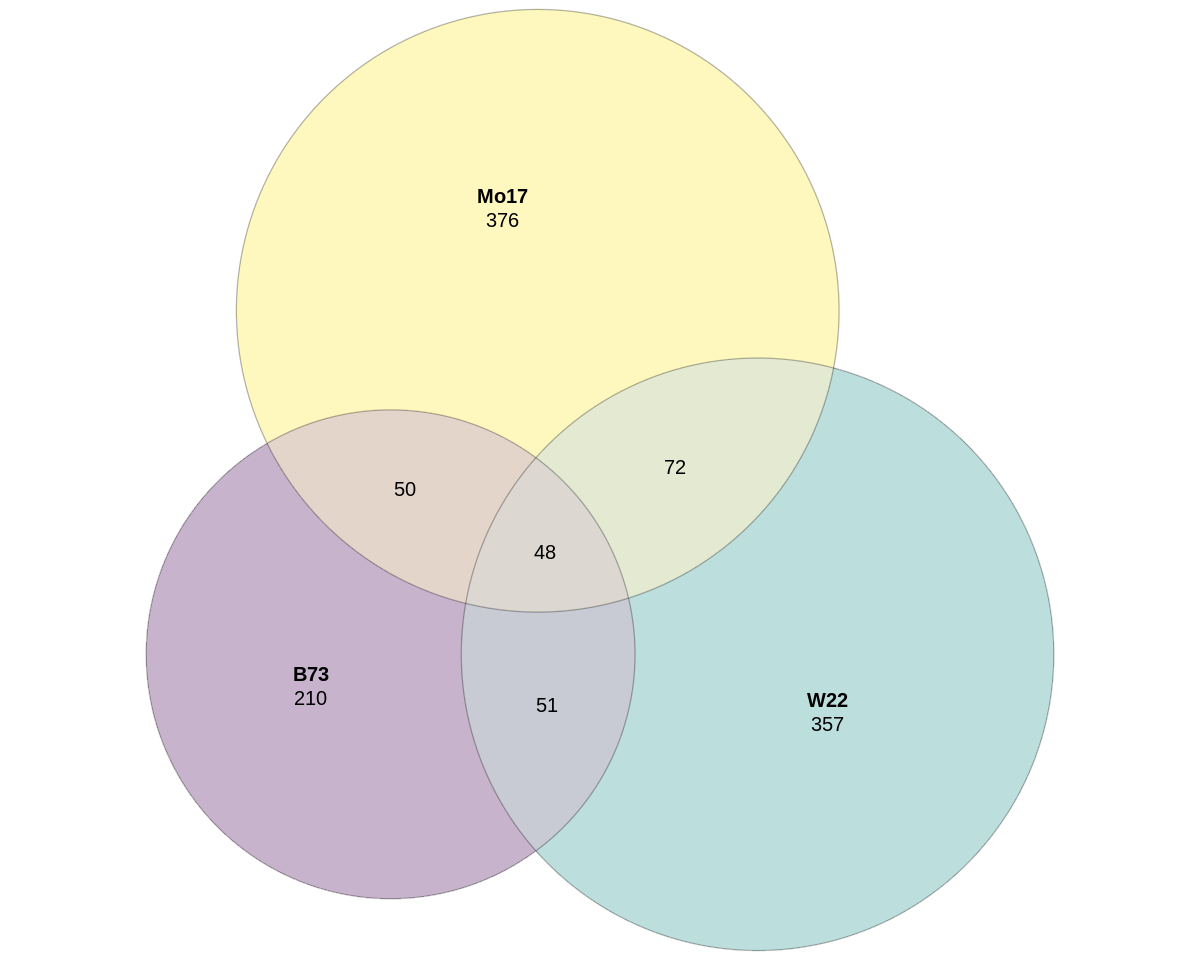

In [9]:
library(eulerr)
B73upheatte = B73heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
B73upcoldte = B73coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

W22upheatte = W22heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
W22upcoldte = W22coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

Mo17upheatte = Mo17heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
Mo17upcoldte = Mo17coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

#svg("Cold-upregulated-TEfamily-threegeno.svg")
coldupte = list(B73=B73upcoldte, W22=W22upcoldte, Mo17=Mo17upcoldte)
plot(euler(coldupte), quantities = TRUE, fills = list(fill = c("#440154ff", '#21908dff', '#fde725ff')), alpha=0.3)
#dev.off()

#svg("Heat-upregulated-TEfamily-threegeno.svg")
heatupte = list(B73=B73upheatte, W22=W22upheatte, Mo17=Mo17upheatte)
plot(euler(heatupte), quantities = TRUE, fills = list(fill = c("#440154ff", '#21908dff', '#fde725ff')), alpha=0.3)
#dev.off()
#======================End for Venn digram visualization===========================#

In [10]:
#=========across treatment venn=================================#
B73coldte = read.table("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
B73heatte = read.table("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)
B73upcoldte = B73coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
B73upheatte = B73heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
B73 = list(B73_cold=B73upcoldte,B73_heat=B73upheatte)
svg("B73-cold-heat-TEfamily.svg")
plot(euler(B73), quantities = TRUE)
dev.off()
b = intersect(B73upcoldte,B73upheatte)

W22coldte = read.table("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
W22heatte = read.table("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)
W22upcoldte = W22coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
W22upheatte = W22heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
W22 = list(W22_cold=W22upcoldte,W22_heat=W22upheatte)
svg("W22-cold-heat-TEfamily.svg")
plot(euler(W22), quantities = TRUE)
dev.off()
w = intersect(W22upcoldte,W22upheatte)

Mo17coldte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt",sep=' ',head=T)
Mo17heatte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt",sep=' ',head=T)
Mo17upcoldte = Mo17coldte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
Mo17upheatte = Mo17heatte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
Mo17 = list(Mo17_cold=Mo17upcoldte,Mo17_heat=Mo17upheatte)
svg("Mo17-cold-heat-TEfamily.svg")
plot(euler(Mo17), quantities = TRUE)
dev.off()
m = intersect(Mo17upcoldte,Mo17upheatte)

png 
  2

png 
  2

png 
  2

In [11]:
intersect(b,intersect(m,w))

[1] "RLG08887" "RLX10775" "RLX13504"

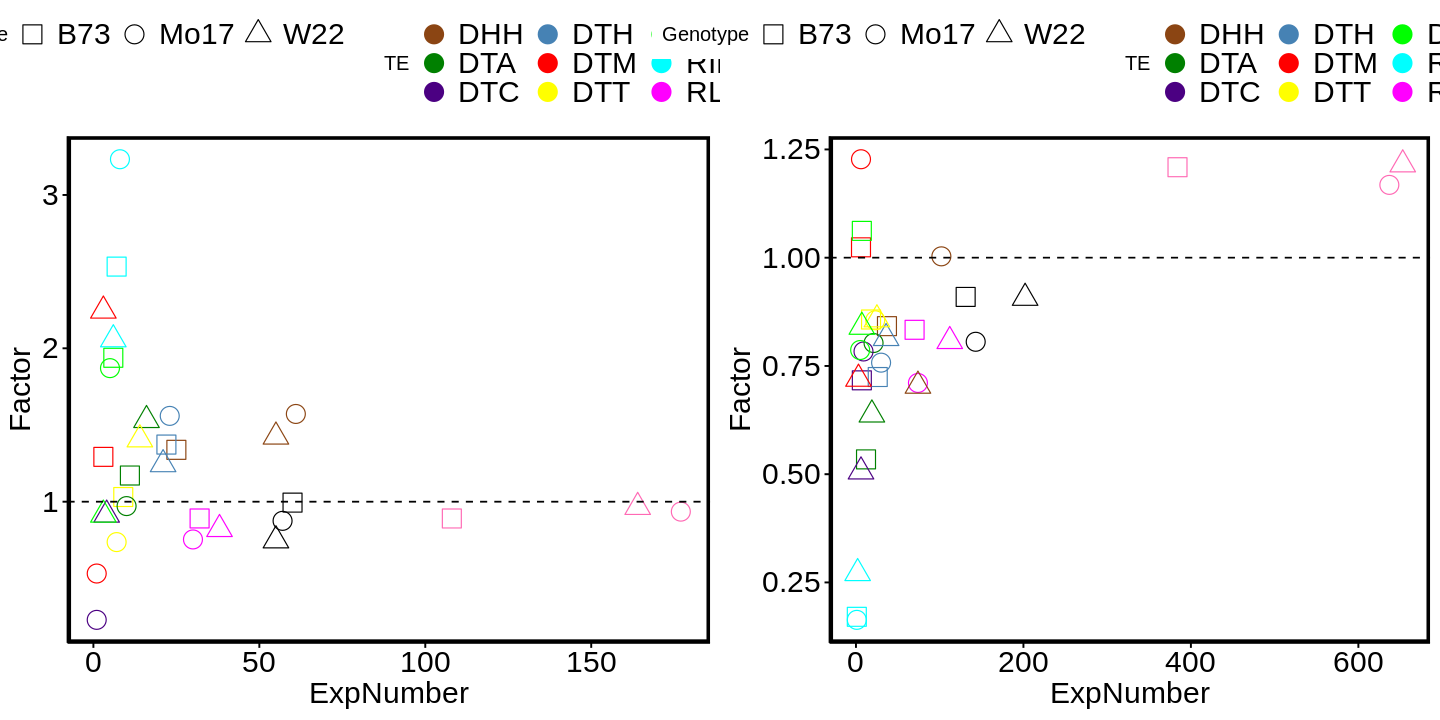

In [1116]:
#====================Notice: input data needs to be well prepared by Python=======================#
#====================Start from here==============================================================#
colMain = colorRampPalette(brewer.pal(9, "Set1"))(12)
colMain = c("#8b4513","#008000","#4b0082","#4682b4","#ff0000","#ffff00","#00ff00","#00ffff","#ff00ff","black","#ff69b4")
cold = read.table("Enriched-TEfamily/Three-upcold-expTE-TEfamily.txt",sep='\t',head=T)
coldfilter = cold %>% filter(!TE %in% c("RST","RIT"))
p1 = ggscatter(coldfilter, x = "ExpNumber", y = "Factor",
   color = "TE", shape = "Genotype", size=5, palette=colMain) + scale_shape_manual(values = c(0,1,2))+
   theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid")) +
   geom_hline(yintercept=1, linetype="dashed", color = "black") +
   font("xy.text", size = 18, color = "black") +
   font("legend.text", color = "black", size=18) +
   font("xylab", color = "black", size=18)

heat = read.table("Enriched-TEfamily/Three-upheat-expTE-TEfamily.txt",sep='\t',head=T)
heatfilter = heat %>% filter(!TE %in% c("RST","RIT"))
p2 = ggscatter(heatfilter, x = "ExpNumber", y = "Factor",
   color = "TE", shape = "Genotype", size=5, palette=colMain) + scale_shape_manual(values = c(0,1,2))+
   theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid")) +
   geom_hline(yintercept=1, linetype="dashed", color = "black") +
   font("xy.text", size = 18, color = "black") +
   font("legend.text", color = "black", size=18) +
   font("xylab", color = "black", size=18) 
options(repr.plot.width=12, repr.plot.height=6)
ggarrange(p1,p2,ncol=2)
#svg("enriched-legend.svg",width=20,height=6)
#p2
#dev.off()
#svg("cold-enriched-TEfamily.svg",width=6,height=6)
#p1
#dev.off()
#svg("heat-enriched-TEfamily.svg",width=6,height=6)
#p2
#dev.off()

In [14]:
#=======================TE family size===============================#

famsize = function(file1, file2, genotype, condition){
    fh = read.table(file1, sep=' ', head=T)
    de1 = fh %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
    fam = read.table(file2,sep='\t',head=F)
    colnames(fam) = c("TE","Size")
    newfam = fam %>% filter(TE %in% de1) %>% mutate(Class = ifelse(Size > 50, ">50", 
                                                               ifelse(Size >= 10 & Size <= 50, "10-50",
                                                                         ifelse(Size >=2 & Size < 10, "2-9", "1")))) 
    Condition = paste(genotype, condition, sep="-")
    fdata = as.data.frame(cbind(table(newfam$Class), rep(Condition, 4)))
    colnames(fdata) = c("Number","Condition")
    fdata$Class = rownames(fdata)
    rownames(fdata) = NULL
    fdata$Class = factor(fdata$Class, levels=c("1","2-9","10-50",">50"))
    fdata$Number = as.numeric(as.character(fdata$Number))
    kdata = fdata %>% group_by(Condition) %>% mutate(Prop = Number/sum(Number)) %>% ungroup()
    return(kdata)
}

expfamsize = function(file1, file2, genotype, condition){
    fh = read.table(file1, sep=' ', head=T)
    de1 = fh %>% pull(Feature)
    fam = read.table(file2,sep='\t',head=F)
    colnames(fam) = c("TE","Size")
    newfam = fam %>% filter(TE %in% de1) %>% mutate(Class = ifelse(Size > 50, ">50", 
                                                               ifelse(Size >= 10 & Size <= 50, "10-50",
                                                                         ifelse(Size >=2 & Size < 10, "2-9", "1")))) 
    Condition = paste(genotype, condition, sep="-")
    fdata = as.data.frame(cbind(table(newfam$Class), rep(Condition, 4)))
    colnames(fdata) = c("Number","Condition")
    fdata$Class = rownames(fdata)
    rownames(fdata) = NULL
    fdata$Class = factor(fdata$Class, levels=c("1","2-9","10-50",">50"))
    fdata$Number = as.numeric(as.character(fdata$Number))
    kdata = fdata %>% group_by(Condition) %>% mutate(Prop = Number/sum(Number)) %>% ungroup()
    return(kdata)
}

a1 = famsize("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/B73-famsize.txt","B73","UpCold")
a2 = famsize("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/W22-famsize.txt","W22","UpCold")
a3 = famsize("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/Mo17-famsize.txt","Mo17","UpCold")

b1 = famsize("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/B73-famsize.txt","B73","UpHeat")
b2 = famsize("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/W22-famsize.txt","W22","UpHeat")
b3 = famsize("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/Mo17-famsize.txt","Mo17","UpHeat")

c1 = expfamsize("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/B73-famsize.txt","B73","ColdExp")
c2 = expfamsize("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/W22-famsize.txt","W22","ColdExp")
c3 = expfamsize("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/Mo17-famsize.txt","Mo17","ColdExp")

d1 = expfamsize("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/B73-famsize.txt","B73","HeatExp")
d2 = expfamsize("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/W22-famsize.txt","W22","HeatExp")
d3 = expfamsize("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt","~/Documents/genomeinfo/TE-original-annotation/Mo17-famsize.txt","Mo17","HeatExp")

t1 = read.table("~/Documents/genomeinfo/TE-number-perfamily/B73-total-class.txt",sep='\t',head=T)
t2 = read.table("~/Documents/genomeinfo/TE-number-perfamily/W22-total-class.txt",sep='\t',head=T)
t3 = read.table("~/Documents/genomeinfo/TE-number-perfamily/Mo17-total-class.txt",sep='\t',head=T)

k = rbind(a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,t1,t2,t3)
options(repr.plot.width=8, repr.plot.height=8)

svg("TE-size-proportion.svg")
ggbarplot(k, "Condition", "Prop",
  fill = "Class", color = "Class",  palette = "RdYlBu") +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1))+
    font("xy.text", size = 16, color = "black", family="sans") +
    font("legend.text", color = "black", size=16, family="sans")
dev.off()

png 
  2

In [10]:
#======================Draw scatter plot for multiple members in TE families======================#
# organizing number of data input for drawing scatter plot for TE families 
findrepTE = function(file1, file2, file3, ...){
    x = c()
    for (i in list(...)){
        x = c(x, i[1])
    }
    de = read.table(file1,sep=' ',head=T)
    # filter DE TE 
    filterde = de %>% filter(log2FoldChange > 1, padj <= 0.05) %>% select(Feature, log2FoldChange)
    # read multi mapping ratio
    multi = read.table(file2,sep='\t',head=T)
    filtermulti = multi %>% filter(Feature %in% filterde$Feature) %>% select(Feature, x)
    new = filtermulti %>% mutate(ctrl = rowMeans(select(., x)))
    # add expressed TE elements to each TE family
    number = read.table(file3, head=F)
    colnames(number) = c("Feature","Number")
    f = left_join(new, number, by = c("Feature"))
    final = left_join(filterde, f, by=c("Feature")) %>% select(Feature, ctrl, Number, log2FoldChange) %>% replace_na(list(ctrl=0, Number=0)) %>% mutate(Number=replace(Number, Number > 9, 10))
    return (final)
}

In [11]:
Bc = findrepTE("DEvalue//B73-DE-TEfamily-expressed-cold-Aug.txt", "UniqueMappingRatio/ca20a3-B73-cold-uniqueratio.txt",
                 "ExpressedTE-perfamily/B73-expressed-cold-TEmembers-Aug.txt",
                 "BC1","BC2","BC3","BC4","BC5","BN1","BN2","BN3","BN5")
Wc = findrepTE("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt", "UniqueMappingRatio/ca20a3-W22-cold-uniqueratio.txt",
                 "ExpressedTE-perfamily/W22-expressed-cold-TEmembers-Aug-1-2.txt",
                 "WC1","WC2","WC3","WC4","WC5","WN1","WN2","WN3","WN4","WN5")
Mc = findrepTE("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt", "UniqueMappingRatio/ca20a3-Mo17-cold-uniqueratio.txt",
                 "ExpressedTE-perfamily/Mo17-expressed-cold-TEmembers-Aug.txt",
               "MC1","MC2","MC3","MC4","MC5","MN1","MN2","MN3","MN4","MN5")
###
Bh = findrepTE("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt", "UniqueMappingRatio/ca20a3-B73-heat-uniqueratio.txt",
                 "ExpressedTE-perfamily/B73-expressed-heat-TEmembers-Aug.txt",
                 "BH1","BH2","BH3","BH4","BH5","BN1","BN2","BN3","BN5")
Wh = findrepTE("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt", "UniqueMappingRatio/ca20a3-W22-heat-uniqueratio.txt",
                 "ExpressedTE-perfamily/W22-expressed-heat-TEmembers-Aug.txt",
                 "WH1","WH2","WH3","WH4","WH5","WN1","WN2","WN3","WN4","WN5")
Mh = findrepTE("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt", "UniqueMappingRatio/ca20a3-Mo17-heat-uniqueratio.txt",
                 "ExpressedTE-perfamily/Mo17-expressed-heat-TEmembers-Aug.txt",
               "MH1","MH2","MH3","MH4","MH5","MN1","MN2","MN3","MN4","MN5")
###
colnames(Bc)[1] = "TE"
colnames(Wc)[1] = "TE"
colnames(Mc)[1] = "TE"
colnames(Bh)[1] = "TE"
colnames(Wh)[1] = "TE"
colnames(Mh)[1] = "TE"

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(x)` instead of `x` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [13]:
#=============calculating overlapping umr===============================#

x1 = Bc %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)
x2 = Wc %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)
x3 = Mc %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)
 
y1 = Bh %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)
y2 = Wh %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)
y3 = Mh %>% filter(ctrl >= 0.66 & Number >= 2) %>% pull(TE)

length(x1)
length(x2)
length(x3)
length(y1)
length(y2)
length(y3)

umr = read.table("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",head=F)
Bte = read.table("/home/zliang/Documents/genomeinfo/B73.structuralTEv2.allTEelement.txt",head=F)
Bcte = read.table("DEvalue//B73-DE-TEelement-expressed-cold-Aug.txt",sep=' ',head=T)
Bhte = read.table("DEvalue//B73-DE-TEelement-expressed-heat-Aug.txt",sep=' ',head=T)
Bctotal = Bcte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1)
Bhtotal = Bhte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1)

colnames(Bte) = "Feature"

print ("###")

Bcteup = Bctotal %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
Bcteexp = Bctotal %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% pull(Feature)
Bcteexponly = setdiff(Bcteexp, Bcteup)

print (length(Bcteexponly))
coBcupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(Feature %in% Bcteup) %>% filter(Feature %in% umr$V1)
coBcupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(Feature %in% Bcteup) %>% filter(!Feature %in% umr$V1)

expBcupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(Feature %in% Bcteexponly) %>% filter(Feature %in% umr$V1)
expBcupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(Feature %in% Bcteexponly) %>% filter(!Feature %in% umr$V1)

noexpBcupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(!Feature %in% Bcteexp) %>% filter(Feature %in% umr$V1)
noexpBcupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% x1) %>% filter(!Feature %in% Bcteexp) %>% filter(!Feature %in% umr$V1)

dim(coBcupte_umr)
dim(coBcupte_noumr)
dim(expBcupte_umr)
dim(expBcupte_noumr)
dim(noexpBcupte_umr)
dim(noexpBcupte_noumr)
print ('###')

Bhteup = Bhtotal %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
Bhteexp = Bhtotal %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% pull(Feature)
Bhteexponly = setdiff(Bhteexp, Bhteup)

coBhupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(Feature %in% Bhteup) %>% filter(Feature %in% umr$V1)
coBhupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(Feature %in% Bhteup) %>% filter(!Feature %in% umr$V1)

expBhupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(Feature %in% Bhteexponly) %>% filter(Feature %in% umr$V1)
expBhupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(Feature %in% Bhteexponly) %>% filter(!Feature %in% umr$V1)

noexpBhupte_umr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(!Feature %in% Bhteexp) %>% filter(Feature %in% umr$V1)
noexpBhupte_noumr = Bte %>% mutate(fam = substr(Feature, 1, 8)) %>%
    filter(fam %in% y1) %>% filter(!Feature %in% Bhteexp) %>% filter(!Feature %in% umr$V1)
dim(coBhupte_umr)
dim(coBhupte_noumr)
dim(expBhupte_umr)
dim(expBhupte_noumr)
dim(noexpBhupte_umr)
dim(noexpBhupte_noumr)

[1] 6

[1] 11

[1] 9

[1] 16

[1] 32

[1] 29

[1] "###"
[1] 16


[1] 7 2

[1] 13  2

[1] 7 2

[1] 9 2

[1] 349   2

[1] 7446    2

[1] "###"


[1] 33  2

[1] 31  2

[1] 28  2

[1] 23  2

[1] 284   2

[1] 26463     2

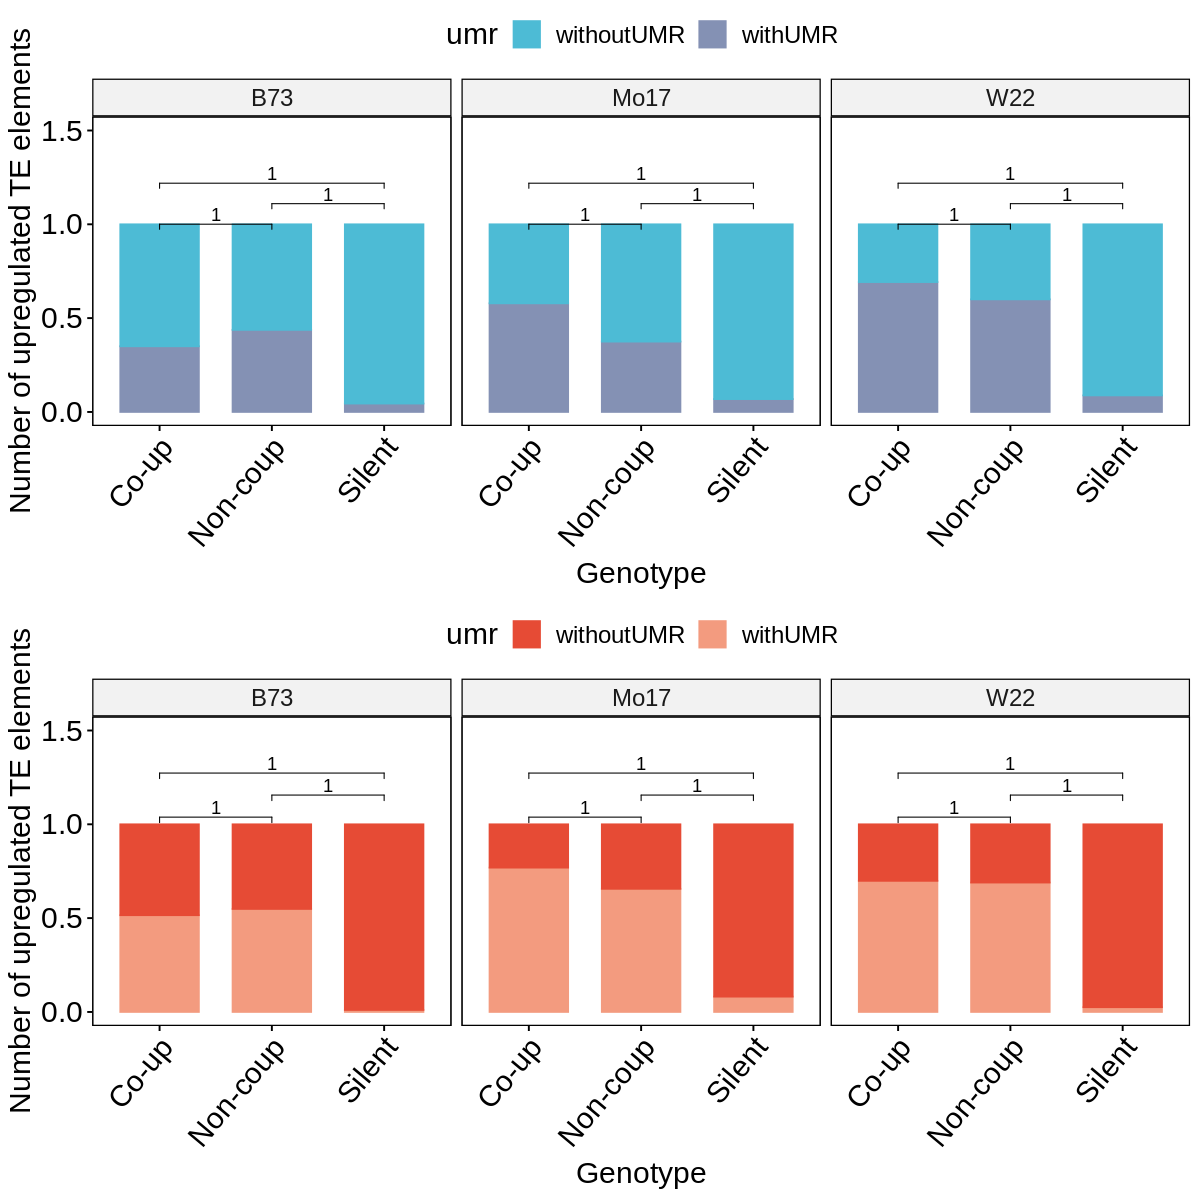

In [9]:
# B73; up, noup, noexp
# B73 cold UMR/noUMR --> 7/13, 7/9, 349/7446
# B73 heat UMR/noUMR --> 33/31, 28/23, 284/26463
# W22 cold UMR/noUMR --> 9/4, 3/2, 94/972
# W22 heat UMR/noUMR --> 58/25, 20/9, 459/17729
# Mo17 cold UMR/noUMR --> 11/8, 6/10, 96/1305
# Mo17 heat UMR/noUMR --> 40/12, 21/11, 610/6865
#detach("package:plyr", unload=TRUE)
library(dplyr)
value = c(7,13,7,9,349,7446,9,4,3,2,94,972,11,8,6,10,96,1305)
direction = rep(c("Co-up","Co-up","Non-coup","Non-coup","Silent","Silent"),3)
geno = c(rep("B73",6),rep("W22",6),rep("Mo17",6))
umr = c(rep(c("withUMR","withoutUMR"),9))
data1 = data.frame(geno,umr,direction,value)
data1s = data1 %>% group_by(geno, direction) %>% mutate(prop = value/sum(value)) %>% ungroup()

options(repr.plot.width=10, repr.plot.height=10)
#svg("TE-selectedTEfamily-cold.svg",width=8,height=6)
my_comparisons <- list( c("Co-up","Non-coup"), c("Non-coup","Silent"), c("Co-up", "Silent"))
p1 = ggbarplot(data1s, "direction", "prop", 
  fill="umr", color = "umr", palette = c("#4DBBD5FF","#8491B4FF"), facet.by = "geno", ylab="Number of upregulated TE elements",
  lab.col = "white", lab.pos = "in", xlab="Genotype")+
  stat_compare_means(comparisons = my_comparisons)+
  theme(panel.background = element_rect(fill = "white", colour = "black"),
       axis.text.x = element_text(angle = 50, hjust=1),text = element_text(size = 18))+ylim(0,1.5)
#dev.off()

value = c(33,31,28,23,284,26463,58,25,20,9,459,17729,40,12,21,11,610,6865)
direction = rep(c("Co-up","Co-up","Non-coup","Non-coup","Silent","Silent"),3)
geno = c(rep("B73",6),rep("W22",6),rep("Mo17",6))
umr = c(rep(c("withUMR","withoutUMR"),9))
data2 = data.frame(geno,umr,direction,value)
data2s = data2 %>% group_by(geno, direction) %>% mutate(prop = value/sum(value)) %>% ungroup()

options(repr.plot.width=10, repr.plot.height=10)
#svg("TE-selectedTEfamily-heat.svg",width=8,height=6)
p2 = ggbarplot(data2s, "direction", "prop", 
  fill="umr", color = "umr", palette = c("#E64B35FF","#F39B7FFF"), facet.by = "geno", ylab="Number of upregulated TE elements",
  lab.col = "white", lab.pos = "in", xlab="Genotype")+
  stat_compare_means(comparisons = my_comparisons)+
  theme(panel.background = element_rect(fill = "white", colour = "black"),
       axis.text.x = element_text(angle = 50, hjust=1),text = element_text(size = 18))+ylim(0,1.5)
#dev.off()
svg("TE-selectedTEfamily-bothstress-withsignificance.svg",width=10,height=10)
ggarrange(p1,p2,ncol=1)
dev.off()

In [34]:
threecold = intersect(Mc$TE, intersect(Bc$TE, Wc$TE))
threeheat = intersect(Mh$TE, intersect(Bh$TE, Wh$TE))
Bclabel = Bc %>% filter(Number >= 2 & ctrl > 0.66 & TE %in% threecold) 
Bhlabel = Bh %>% filter(Number >= 2 & ctrl > 0.66 & TE %in% threeheat) 

In [41]:
N20 = Wc %>% filter(ctrl <= 0.33)
Nmid = Wc %>% filter(ctrl > 0.33 & ctrl <= 0.66)
N80 = Wc %>% filter(ctrl > 0.66)
dim(N20)[1]
dim(Nmid)[1]
dim(N80)[1]

N20 = Wh %>% filter(ctrl <= 0.33)
Nmid = Wh %>% filter(ctrl > 0.33 & ctrl <= 0.66)
N80 = Wh %>% filter(ctrl > 0.66)
dim(N20)[1]
dim(Nmid)[1]
dim(N80)[1]

[1] 21

[1] 21

[1] 129

[1] 92

[1] 110

[1] 326

In [44]:
# drawing scatter plot for TE families 
drawScatter = function(data, name, small, moderate, large){
    if (name == "B73 heat" | name == "Mo17 cold"){
        mpal = c('#E41A1C','#377EB8','#4DAF4A','#FF7F00')
    }else{
        mpal = brewer.pal(n = 5, name = "Set1")
    }
    data1 = data %>% mutate(TEnumber=ifelse(Number == 0, "0", 
                                    ifelse(Number == 1, "1", 
                                           ifelse(Number > 1 & Number <=5, "2-5", 
                                                  ifelse(Number > 5 & Number <=9, "6-9", ">9")))))
    data1$TEnumber = factor(data1$TEnumber, levels=c("0","1","2-5","6-9",">9"))
    p = ggscatter(data1, x = "ctrl", y = "log2FoldChange",
               color = "TEnumber", palette = mpal, size=3, alpha=0.5) +  
                geom_vline(xintercept = 0.33, color = "black", alpha=0.5, size=0.8, linetype="dotted") + 
                geom_vline(xintercept = 0.66, color = "black", alpha=0.5, size=0.8, linetype="dotted") +
                xlab("Unique Mapping Ratio") + ggtitle(name) + 
                theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid")) +
                annotate(geom="text", x=0.08, y=10, label=small, color="black") + 
                annotate(geom="text", x=0.5, y=10, label=moderate, color="black") + 
                annotate(geom="text", x=0.92, y=10, label=large, color="black") +
                font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans")
    return (p)
}

options(repr.plot.width=6, repr.plot.height=12)
p1 = drawScatter(Bc, "B73 cold", "17 TE families", "33 TE families", "97 TE families") +  
    scale_y_continuous(breaks = seq(1, 12, by = 2),limits = c(1,12))+
    geom_text_repel(
                data = filter(Bc, TE %in% Bclabel$TE),
                aes(label = TE),
                size = 4,
                box.padding = unit(0.5, "lines"),
                point.padding = unit(0.5, "lines")) +
                font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans")

a1 = drawScatter(Bh, "B73 heat", "53 TE families", "73 TE families", "233 TE families") +
    scale_y_continuous(breaks = seq(1, 12, by = 2),limits = c(1,12))+
    geom_text_repel(
                data = filter(Bh, TE %in% Bhlabel$TE),
                aes(label = TE),
                size = 4,
                box.padding = unit(0.5, "lines"),
                point.padding = unit(0.5, "lines")) +
                font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans")
x = ggarrange(p1, a1, ncol=1)
svg("two-plot.svg",width=6,height=12)
x
dev.off()

png 
  2

In [46]:
p1 = drawScatter(Wc, "W22 cold", "21 TE families", "21 TE families", "129 TE families") +
    scale_y_continuous(breaks = seq(1, 13, by = 2))
p2 = drawScatter(Wh, "W22 heat", "92 TE families", "110 TE families", "326 TE families") +
scale_y_continuous(breaks = seq(1, 15, by = 2))
svg("two-plot-w22.svg",width=6,height=12)
ggarrange(p1,p2,ncol=1)
dev.off()
p1 = drawScatter(Mc, "Mo17 cold", "21 TE families", "26 TE families", "129 TE families") +
scale_y_continuous(breaks = seq(1, 13, by = 2))
p2 = drawScatter(Mh, "Mo17 heat", "114 TE families", "106 TE families", "326 TE families") +
scale_y_continuous(breaks = seq(1, 15, by = 2))
svg("two-plot-mo17.svg",width=6,height=12)
ggarrange(p1,p2,ncol=1)
dev.off()
#====================End scatter plot====================================================#

png 
  2

png 
  2

In [48]:
#====================Selected TE families in B73 in both cold and heat===================#
Bcpm = read.table("CPMvalue/B73-CPM-TEelement-total-Aug.txt",sep=' ',head=T)
Scontrol = c("BN1","BN2","BN3","BN5")
Scold = c("BC1","BC2","BC3","BC4","BC5")
Sheat = c("BH1","BH2","BH3","BH4","BH5")
Bcpm_simple = Bcpm %>% mutate(control = rowMeans(select(., Scontrol)), cold = rowMeans(select(., Scold)), heat=rowMeans(select(., Sheat))) %>%
    select(Feature, control, cold, heat) %>% mutate(fam = substr(Feature, 1,8)) %>% filter(control != 0 | cold != 0 | heat != 0) %>%
    group_by(fam) %>% mutate(Pcontrol = control/sum(control), Pcold = cold/sum(cold), Pheat = heat/sum(heat)) %>% ungroup() %>%
    select(Feature, control, cold, heat, fam)
head(Bcpm_simple)

Feature,control,cold,heat,fam
<fct>,<dbl>,<dbl>,<dbl>,<chr>
DHH00001Zm00001d00017,0.0000000,0.01729049,0.00829718,DHH00001
DHH00001Zm00001d00020,0.9926024,0.18695186,0.97862574,DHH00001
DHH00001Zm00001d00021,0.2210750,0.10369050,0.20262698,DHH00001
DHH00001Zm00001d00067,0.0000000,0.00000000,0.01846744,DHH00001
DHH00001Zm00001d00092,0.0000000,0.00000000,0.18224886,DHH00001
DHH00001Zm00001d00100,0.1293657,0.04271082,0.15539941,DHH00001


In [56]:
options(repr.plot.width=6, repr.plot.height=6)
# RLG00037, DTH00434, RLG00292, RLC00151, RLC00157, DTH11270
k = Bcpm_simple %>% filter(fam == "DTH11270") %>% gather(key="Condition",value="Mean_CPM", -Feature, -fam)
p6 = ggbarplot(k, "Condition", "Mean_CPM",
  fill = "Feature", color = "Feature", main = "DTH11270",legend = "none",legend.title="TE element") +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1))+
    font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans")
#============================End for looking for specific TE family==================================#

In [58]:
options(repr.plot.width=12,repr.plot.height=10)
svg("Examples-TEexpression.svg",width=12,height=10)
ggarrange(p1,p2,p3,p4,p5,p6)
dev.off()

png 
  2

In [59]:
# looking for TE elements that are regulated in the same direction as their families
findcommon = function(fam, te){
    # fam is TE families 
    fam = read.table(fam,sep=' ',head=T)
    colnames(fam)[1] = "fam"
    ffam = fam %>% filter(log2FoldChange > 1 & padj <= 0.05) # ffam is upregulated TE families 
    # te is TE elements
    te = read.table(te,sep=' ',head=T)
    ute = te %>% filter(log2FoldChange > 1 & padj <= 0.05) # ute is upregulated TE elements 
    # fte is co-upregulated TE elements
    fte = te %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% mutate(fam = substr(Feature,1,8)) %>% 
        left_join(ffam, by="fam") %>% filter(log2FoldChange.y > 1 & padj.y <= 0.05) %>% drop_na()
    fnumber = dim(ute)[1] # total upregulated TE elements
    consist = dim(fte)[1] # consistent upregulated TE elements 
    inconsist = fnumber - consist # inconsistent upregulated TE elements 
    print ("Consist,Inconsist")
    return (list(consist, inconsist, fte$Feature, setdiff(ute$Feature, fte$Feature)))
}

findcommonset = function(fam, te){
    # fam is TE families 
    fam = read.table(fam,sep=' ',head=T)
    colnames(fam)[1] = "fam"
    ffam = fam %>% filter(log2FoldChange > 1 & padj <= 0.05)  # ffam is upregulated TE families 
    # te is TE elements
    te = read.table(te,sep=' ',head=T)
    ute = te %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% mutate(fam = substr(Feature,1,8)) # ute is upregulated TE elements 
    # fte is co-upregulated TE elements
    fte0 = ffam %>% left_join(ute, by="fam") %>% filter(is.na(Feature)) %>% pull(fam)
    fte1 = ffam %>% left_join(ute, by="fam") %>% filter(!is.na(Feature)) %>% pull(fam)
    return (c(length(unique(fte0)), length(unique(fte1))))
}

In [60]:
slist = c()
geno = c(rep("B73",4),rep("W22",4),rep("Mo17",4))
treat = c(rep(c("cold","cold","heat","heat"),3))
direct = c(rep(c("Consist","Inconsist"),6))
x = findcommonset("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt")
slist = c(slist, x[1], x[2])
x = findcommonset("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt")
slist = c(slist, x[1], x[2])
x = findcommonset("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt")
slist = c(slist, x[1], x[2])
x = findcommonset("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt")
slist = c(slist, x[1], x[2])
x = findcommonset("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt")
slist = c(slist, x[1], x[2])
x = findcommonset("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt")
slist = c(slist, x[1], x[2])
data1 = data.frame(slist, geno, treat, direct)

In [61]:
tlist = c()
geno = c(rep("B73",4),rep("W22",4),rep("Mo17",4))
treat = c(rep(c("cold","cold","heat","heat"),3))
direct = c(rep(c("Consist","Inconsist"),6))
x = findcommon("DEvalue/B73-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])
x = findcommon("DEvalue/B73-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])
x = findcommon("DEvalue/W22-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])
x = findcommon("DEvalue/W22-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])
x = findcommon("DEvalue/Mo17-DE-TEfamily-expressed-cold-Aug.txt","DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])
x = findcommon("DEvalue/Mo17-DE-TEfamily-expressed-heat-Aug.txt","DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt")
tlist = c(tlist, x[[1]], x[[2]])

[1] "Consist,Inconsist"
[1] "Consist,Inconsist"
[1] "Consist,Inconsist"
[1] "Consist,Inconsist"
[1] "Consist,Inconsist"
[1] "Consist,Inconsist"


In [68]:
options(repr.plot.width=6, repr.plot.height=10)
data = data.frame(tlist, geno, treat, direct)
p1 = ggbarplot(data, "geno", "tlist", 
  fill="direct", color = "direct", palette = c("#E64B35FF","#F39B7FFF"), facet.by = "treat", ylab="Number of upregulated TE elements",
  label = TRUE, lab.col = "white", lab.pos = "in", xlab="Genotype")+
  theme(panel.background = element_rect(fill = "white", colour = "black"),
      strip.background = element_rect(fill = "white", colour = "black"),
       axis.text.x = element_text(angle = 50, hjust=1),text = element_text(size = 18))

data1 = data.frame(slist, geno, treat, direct)
p2 = ggbarplot(data1, "geno", "slist",
  fill="direct", color = "direct", palette = c("#4DBBD5FF","#8491B4FF"), facet.by = "treat", ylab="Number of upregulated TE families",
  label = TRUE, lab.col = "white", lab.pos = "in", xlab="Genotype") +
theme(panel.background = element_rect(fill = "white", colour = "black"),
      strip.background = element_rect(fill = "white", colour = "black"),
       axis.text.x = element_text(angle = 50, hjust=1),text = element_text(size = 18))
svg("consistent-te2.svg",height=12, width=8)
ggarrange(p1, p2, ncol=1)
dev.off()

png 
  2

In [3]:
#================generating data for sankey plot====================#
sankeymetric = function(te1, te2, ab, a, b){
    x = read.table(te1, sep=" ",head=T) # DE TE element in genotype 1
    upte1 = x %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature) # filtering upregulated TE elements in genotype 1
    print (paste("Total upregulated TE",as.character(length(upte1)),sep=':'))
    assoc = read.table(ab, sep='\t', head=T) # reading association file between genotype 1 and 2
    resolve = assoc %>% filter(get(a) != 'NA') %>% pull(get(a)) # filtering out resolved genotype 1
    a_b = assoc %>% filter(get(a) != 'NA' & get(b) != "NA") %>% pull(get(a)) # filtering out association file between genotype 1 and 2
    resolve_upte1 = intersect(upte1, resolve) 
    unresolve = setdiff(upte1, resolve_upte1) # getting unresolved upte1 
    print (paste("Unresolved TE",as.character(length(unresolve)),sep=':'))
    resolve_ab = intersect(upte1, a_b) # getting resolved upte1 with association between 1 and 2
    print (paste("Shared_a_b",as.character(length(resolve_ab)),sep=":"))
    uniq1 = setdiff(resolve_upte1, resolve_ab) # getting resolved upte1 that is uniquely upregulated in 1
    print (paste("Unique upregulated TE",as.character(length(uniq1)),sep=':'))
    y = read.table(te2, sep=" ",head=T) # DE TE element in genotype 2
    upte2 = y %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature) # filtering upregulated TE element in genotype 2
    expte2 = y %>% pull(Feature) # filtering expressed TE element in genotype 2
    coupte = assoc %>% filter(get(a) != 'NA' & get(b) != "NA") %>% filter(get(a) %in% upte1 & get(b) %in% upte2) %>% pull(get(a))
    noexpte = assoc %>% filter(get(a) != 'NA' & get(b) != "NA") %>% filter(get(a) %in% upte1 & !get(b) %in% expte2) %>% pull(get(a))
    noupte = assoc %>% filter(get(a) != 'NA' & get(b) != "NA") %>% filter(get(a) %in% upte1 & !get(b) %in% upte2 & get(b) %in% expte2) %>% pull(get(a))
    print (paste("Coupregulated TE",as.character(length(coupte)),sep=':'))
    print (paste("Not upregulated TE",as.character(length(noupte)),sep=':'))
    print (paste("Not expressed TE",as.character(length(noexpte)),sep=':'))
    flist = list(uniq1, coupte, noupte, noexpte)
    return (flist)
}

In [4]:
bwcold = sankeymetric("DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt",
                    "DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "B73","W22")
print ('###')
bmcold = sankeymetric("DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt",
            "DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "B73","Mo17")
print ('###')
bwheat = sankeymetric("DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "B73","W22")
print ('###')
bmheat = sankeymetric("DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "B73","Mo17")

[1] "Total upregulated TE:219"
[1] "Unresolved TE:46"
[1] "Shared_a_b:55"
[1] "Unique upregulated TE:118"
[1] "Coupregulated TE:23"
[1] "Not upregulated TE:9"
[1] "Not expressed TE:23"
[1] "###"
[1] "Total upregulated TE:219"
[1] "Unresolved TE:46"
[1] "Shared_a_b:52"
[1] "Unique upregulated TE:121"
[1] "Coupregulated TE:26"
[1] "Not upregulated TE:6"
[1] "Not expressed TE:20"
[1] "###"
[1] "Total upregulated TE:507"
[1] "Unresolved TE:97"
[1] "Shared_a_b:152"
[1] "Unique upregulated TE:258"
[1] "Coupregulated TE:94"
[1] "Not upregulated TE:7"
[1] "Not expressed TE:51"
[1] "###"
[1] "Total upregulated TE:507"
[1] "Unresolved TE:97"
[1] "Shared_a_b:111"
[1] "Unique upregulated TE:299"
[1] "Coupregulated TE:67"
[1] "Not upregulated TE:9"
[1] "Not expressed TE:35"


In [71]:
wbcold = sankeymetric("DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt",
            "DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "W22","B73")
print ('###')
wmcold = sankeymetric("DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt",
            "DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "W22","Mo17")
print ('###')
wbheat = sankeymetric("DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "W22","B73")
print ('###')
wmheat = sankeymetric("DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "W22","Mo17")

[1] "Total upregulated TE:307"
[1] "Unresolved TE:173"
[1] "Shared_a_b:59"
[1] "Unique upregulated TE:75"
[1] "Coupregulated TE:23"
[1] "Not upregulated TE:10"
[1] "Not expressed TE:26"
[1] "###"
[1] "Total upregulated TE:307"
[1] "Unresolved TE:173"
[1] "Shared_a_b:49"
[1] "Unique upregulated TE:85"
[1] "Coupregulated TE:22"
[1] "Not upregulated TE:8"
[1] "Not expressed TE:19"
[1] "###"
[1] "Total upregulated TE:906"
[1] "Unresolved TE:382"
[1] "Shared_a_b:240"
[1] "Unique upregulated TE:284"
[1] "Coupregulated TE:94"
[1] "Not upregulated TE:14"
[1] "Not expressed TE:132"
[1] "###"
[1] "Total upregulated TE:906"
[1] "Unresolved TE:382"
[1] "Shared_a_b:181"
[1] "Unique upregulated TE:343"
[1] "Coupregulated TE:85"
[1] "Not upregulated TE:12"
[1] "Not expressed TE:84"


In [72]:
mbcold = sankeymetric("DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt",
            "DEvalue/B73-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "Mo17","B73")
print ("###")
mwcold = sankeymetric("DEvalue/Mo17-DE-TEelement-expressed-cold-Aug.txt",
            "DEvalue/W22-DE-TEelement-expressed-cold-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "Mo17","W22")
print ("###")
mbheat = sankeymetric("DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/B73-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "Mo17","B73")
print ("###")
mwheat = sankeymetric("DEvalue/Mo17-DE-TEelement-expressed-heat-Aug.txt",
            "DEvalue/W22-DE-TEelement-expressed-heat-Aug.txt",
            "~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
            "Mo17","W22")

[1] "Total upregulated TE:340"
[1] "Unresolved TE:183"
[1] "Shared_a_b:69"
[1] "Unique upregulated TE:88"
[1] "Coupregulated TE:26"
[1] "Not upregulated TE:5"
[1] "Not expressed TE:38"
[1] "###"
[1] "Total upregulated TE:340"
[1] "Unresolved TE:183"
[1] "Shared_a_b:53"
[1] "Unique upregulated TE:104"
[1] "Coupregulated TE:22"
[1] "Not upregulated TE:3"
[1] "Not expressed TE:28"
[1] "###"
[1] "Total upregulated TE:801"
[1] "Unresolved TE:407"
[1] "Shared_a_b:162"
[1] "Unique upregulated TE:232"
[1] "Coupregulated TE:67"
[1] "Not upregulated TE:11"
[1] "Not expressed TE:84"
[1] "###"
[1] "Total upregulated TE:801"
[1] "Unresolved TE:407"
[1] "Shared_a_b:152"
[1] "Unique upregulated TE:242"
[1] "Coupregulated TE:85"
[1] "Not upregulated TE:8"
[1] "Not expressed TE:59"


In [93]:
#================Plotting data for Sankey plot==========================#
library(plyr)

x = c("uniq1","coup1_2","noup1_2","noexp1_2")

#B73
#combine = c(118,23,9,23,121,26,6,20) # this is for cold
#combine = c(258,94,7,51,299,67,9,35) # this is for heat
#W22
#combine = c(75,23,10,26,85,22,8,19) # this is for cold
#combine = c(284,94,14,132,343,85,12,84) # this is for heat
#Mo17
#combine = c(88,26,5,38,104,22,3,28) # this is for cold
combine = c(232,67,11,84,242,85,8,59) # this is for heat

condition = c(rep("Cold", 4),rep("Heat",4))
mylabel = c(rep(x,2))
data2 = cbind(mylabel, combine, condition)
data2 = as.data.frame(data2)
data2$combine = as.numeric(as.character(data2$combine))
data2$mylabel = factor(data2$mylabel, levels=c("noexp1_2", "noup1_2", "coup1_2", "uniq1"))
options(repr.plot.width=10, repr.plot.height=4)
p2 = ggplot(data2, aes(x=mylabel)) +
  geom_bar(data=data2[data2$condition=="Cold",], aes(y=combine, fill=mylabel), stat="identity") +
  geom_bar(data=data2[data2$condition=="Heat",], aes(y=-combine, fill=mylabel), stat="identity") +
  geom_hline(yintercept=0, colour="white", lwd=1) + coord_flip() + 
  labs(y="Number of upregulated TE elements in Mo17 under heat", x="Categories") + scale_y_continuous(breaks=seq(-500,500,50), labels=c(500,450,400,350,300,250,200,150,100,50,0,50,100,150,200,250,300,350,400,450,500)) +
  font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans") +
  scale_fill_manual(values=c("#F39B7FFF","#00A087FF","#4DBBD5FF","#E64B35FF")) +
  theme(axis.text.y=element_blank(),panel.grid.major = element_line(colour = "grey80"),legend.position = "none",
        axis.ticks.y=element_blank(),panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"))

In [95]:
svg("Mo17-centric-cold-heat-TE.svg",width=10,height=8)
options(repr.plot.width=9, repr.plot.height=6)
ggarrange(p1, p2, ncol=1)
dev.off()

png 
  2

In [96]:
returndouble = function(ab, a, b, ...){
    assoc = read.table(ab, sep='\t', head=T) # reading association file between genotype 1 and 2
    xlist = c()
    x1 = list(...)[[1]][[1]]
    x2 = list(...)[[1]][[2]]
    x3 = list(...)[[1]][[3]]
    x4 = list(...)[[1]][[4]]
    b1 = assoc %>% filter(get(a) %in% x1)
    b2 = assoc %>% filter(get(a) %in% x2)
    b3 = assoc %>% filter(get(a) %in% x3)
    b4 = assoc %>% filter(get(a) %in% x4)
    nlist = list(b2, b3, b4)
    return (nlist)
}

bwcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "B73", "W22", bwcold)
bmcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "B73", "Mo17", bmcold)
bwheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "B73", "W22", bwheat)
bmheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "B73", "Mo17", bmheat)

wbcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "W22", "B73", wbcold)
wmcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "W22", "Mo17", wmcold)
wbheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "W22", "B73", wbheat)
wmheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "W22", "Mo17", wmheat)

mbcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "Mo17", "B73", mbcold)
mwcolddata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "Mo17", "W22", mwcold)
mbheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "Mo17", "B73", mbheat)
mwheatdata = returndouble("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",
             "Mo17", "W22", mwheat)

In [97]:
overlapumr = function(au, bu, a, b, ...){
    ag = read.table(au, head=F)
    bg = read.table(bu, head=F)
    i = list(...)[[1]]
    nlist = c("Coup","Noupte1","Noexpte1")
    for (x in c(1:3)){
        an = i[[x]] %>% filter(get(a) %in% ag$V1 & get(b) %in% bg$V1) %>% pull(get(a))
        bn = i[[x]] %>% filter(get(a) %in% ag$V1 & !get(b) %in% bg$V1) %>% pull(get(a))
        ###
        print (nlist[x])
        print (paste("bothUMR",as.character(length(an),sep=":")))
        print (paste("loseUMR in",b,as.character(length(bn),sep=":")))
    }
}

print ("B73 W22 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "B73","W22",bwcolddata)

print ("B73 W22 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "B73","W22",bwheatdata)
print ('####')
print ("B73 Mo17 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "B73","Mo17",bmcolddata)

print ("B73 Mo17 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "B73","Mo17",bmheatdata)

#====
print ("W22 B73 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "W22","B73",wbcolddata)

print ("W22 B73 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "W22","B73",wbheatdata)
print ('####')
print ("W22 Mo17 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "W22","Mo17",wmcolddata)

print ("W22 Mo17 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "W22","Mo17",wmheatdata)
#===
print ("Mo17 B73 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "Mo17","B73",mbcolddata)

print ("Mo17 B73 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",
          "Mo17","B73",mbheatdata)
print ('####')
print ("Mo17 W22 cold TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "Mo17","W22",mwcolddata)

print ("Mo17 W22 heat TE element")
overlapumr("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",
          "~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",
          "Mo17","W22",mwheatdata)

[1] "B73 W22 cold TE element"
[1] "Coup"
[1] "bothUMR 15"
[1] "loseUMR in W22 0"
[1] "Noupte1"
[1] "bothUMR 8"
[1] "loseUMR in W22 0"
[1] "Noexpte1"
[1] "bothUMR 9"
[1] "loseUMR in W22 2"
[1] "B73 W22 heat TE element"
[1] "Coup"
[1] "bothUMR 65"
[1] "loseUMR in W22 2"
[1] "Noupte1"
[1] "bothUMR 5"
[1] "loseUMR in W22 0"
[1] "Noexpte1"
[1] "bothUMR 16"
[1] "loseUMR in W22 5"
[1] "####"
[1] "B73 Mo17 cold TE element"
[1] "Coup"
[1] "bothUMR 14"
[1] "loseUMR in Mo17 0"
[1] "Noupte1"
[1] "bothUMR 4"
[1] "loseUMR in Mo17 0"
[1] "Noexpte1"
[1] "bothUMR 6"
[1] "loseUMR in Mo17 6"
[1] "B73 Mo17 heat TE element"
[1] "Coup"
[1] "bothUMR 43"
[1] "loseUMR in Mo17 0"
[1] "Noupte1"
[1] "bothUMR 5"
[1] "loseUMR in Mo17 0"
[1] "Noexpte1"
[1] "bothUMR 13"
[1] "loseUMR in Mo17 6"
[1] "W22 B73 cold TE element"
[1] "Coup"
[1] "bothUMR 15"
[1] "loseUMR in B73 0"
[1] "Noupte1"
[1] "bothUMR 5"
[1] "loseUMR in B73 0"
[1] "Noexpte1"
[1] "bothUMR 11"
[1] "loseUMR in B73 5"
[1] "W22 B73 heat TE element"
[1] "Cou

In [6]:
#detach("package:plyr", unload=TRUE)
# cold "#E46B35FF", "#F39B7FFF"

options(repr.plot.width=16, repr.plot.height=5)
library(dplyr)
value = c(15,0,9,2,14,0,6,6,15,0,11,5,14,0,8,4,14,2,7,7,14,0,2,3)
umr = rep(c("UMRinA&B","MissingUMRinB"),12)
regulation = rep(c("UpregulationinA&B","UpregulationinA&B","NotexpressedinB","NotexpressedinB"),6)
genotype = c(rep("B73-W22",4),rep("B73-Mo17",4),rep("W22-B73",4),rep("W22-Mo17",4),rep("Mo17-B73",4),rep("Mo17-W22",4))
data1 = data.frame(umr, regulation, genotype, value)
data2 = data1 %>% group_by(genotype, regulation) %>% mutate(prop=round(value/sum(value),digits=2)) %>% ungroup()

p1 = ggplot(data=data2, aes(x=regulation, y=prop, fill=umr)) + xlab("") +
  geom_bar(stat="identity") + theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1), text = element_text(size = 24)) + scale_fill_manual(values=c("#3C5488FF", "#4DBBD5FF"))+
    geom_text(aes(label=value), vjust=1, color="black", size=8) + facet_wrap(~genotype, nrow=1)

#detach("package:plyr", unload=TRUE)
# cold "#E46B35FF", "#F39B7FFF"
options(repr.plot.width=16, repr.plot.height=5)
library(dplyr)
value = c(65,2,16,5,43,0,13,6,65,1,69,11,56,2,38,5,43,0,35,16,56,4,14,13)
umr = rep(c("UMRinA&B","MissingUMRinB"),12)
regulation = rep(c("UpregulationinA&B","UpregulationinA&B","NotexpressedinB","NotexpressedinB"),6)
genotype = c(rep("B73-W22",4),rep("B73-Mo17",4),rep("W22-B73",4),rep("W22-Mo17",4),rep("Mo17-B73",4),rep("Mo17-W22",4))
data1 = data.frame(umr, regulation, genotype, value)
data2 = data1 %>% group_by(genotype, regulation) %>% mutate(prop=round(value/sum(value),digits=2)) %>% ungroup()

p2 = ggplot(data=data2, aes(x=regulation, y=prop, fill=umr)) + xlab("") +
  geom_bar(stat="identity") + theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1), text = element_text(size = 24)) + scale_fill_manual(values=c("#E46B35FF", "#F39B7FFF"))+
    geom_text(aes(label=value), vjust=1, color="black", size=8) + facet_wrap(~genotype, nrow=1)

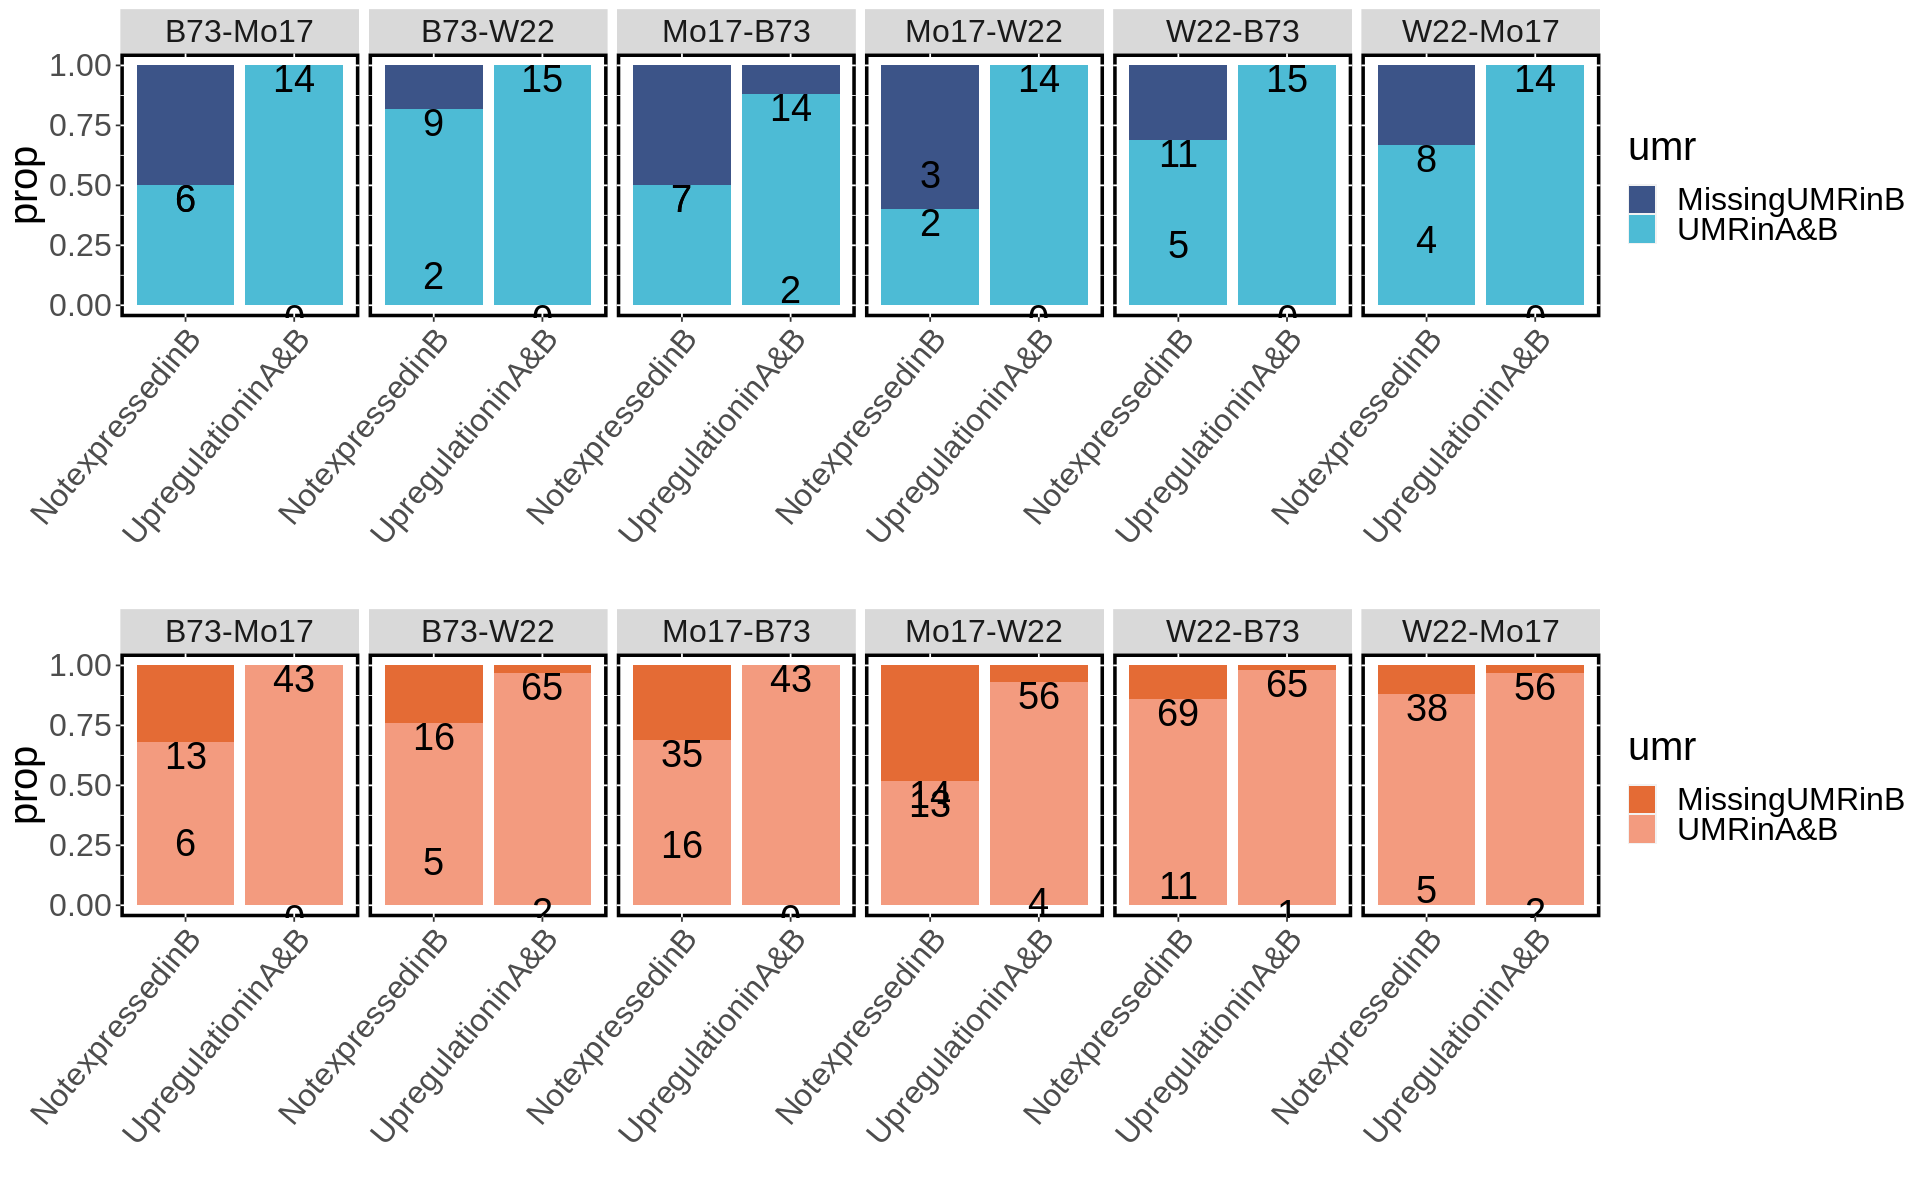

In [7]:
options(repr.plot.width=16, repr.plot.height=10)
#svg("cold-heat-umr.svg",width=16,height=10)
ggarrange(p1,p2,nrow=2)
#dev.off()

In [643]:
reggene = function(ag, bg, agt, bgt, a, b, ...){
    x = read.table(ag, sep=" ",head=T) # DE TE element in genotype 1
    upgene1 = x %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature) # filtering upregulated TE elements in genotype 1
    y = read.table(bg, sep=" ",head=T) # DE TE element in genotype 1
    upgene2 = y %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature) # filtering upregulated TE elements in genotype 1
    tegene1 = read.table(agt, sep=" ", head=T)
    tegene2 = read.table(bgt, sep=" ", head=T)
    colnames(tegene1)[1] = a
    colnames(tegene2)[1] = b
    i = list(...)[[1]]
    nlist = c("Coup","Noupte1","Noexpte1")
    for (x in c(1:3)){
        print (nlist[x])
        an = i[[x]] %>% left_join(tegene1, by=a) %>% filter(Gene %in% upgene1) %>% drop_na() %>% pull(Gene)
        bn = i[[x]] %>% left_join(tegene2, by=b) %>% filter(Gene %in% upgene2) %>% drop_na() %>% pull(Gene)
        ##
        nan = i[[x]] %>% left_join(tegene1, by=a) %>% filter(!Gene %in% upgene1) %>% drop_na() %>% pull(Gene)
        nbn = i[[x]] %>% left_join(tegene2, by=b) %>% filter(!Gene %in% upgene2) %>% drop_na() %>% pull(Gene)
        print (paste("Closest up gene",a,as.character(length(an),sep=":")))
        print (paste("Closest up gene",b,as.character(length(bn),sep=":")))
        print (paste("Closest not up gene",a,as.character(length(nan),sep=":")))
        print (paste("Closest not up gene",b,as.character(length(nbn),sep=":")))
    }
}

print ("B73 W22 cold TE element")
reggene("DEvalue/B73-DE-Gene-expressed-cold.txt",
           "DEvalue/Mo17-DE-Gene-expressed-cold.txt",
           "~/Documents/genomeinfo/TE-original-annotation/B73-closestgene-dist.txt",
           "~/Documents/genomeinfo/TE-original-annotation/Mo17-closestgene-dist.txt",
        "B73","Mo17",bmcolddata)

#print ("B73 W22 heat TE element")
#reggene("../../../Jackie-UMR-ACR//2020newUMR-ACR/TE-withUMR-inB73.txt",
#          "../../../Jackie-UMR-ACR//2020newUMR-ACR/TE-withUMR-inW22.txt",
#          "B73","W22",bwheatdata)

[1] "B73 W22 cold TE element"
[1] "Coup"


Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”
Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”


[1] "Closest up gene B73 1"
[1] "Closest up gene Mo17 0"
[1] "Closest not up gene B73 45"
[1] "Closest not up gene Mo17 46"
[1] "Noupte1"


Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”
Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”


[1] "Closest up gene B73 5"
[1] "Closest up gene Mo17 2"
[1] "Closest not up gene B73 28"
[1] "Closest not up gene Mo17 31"
[1] "Noexpte1"


Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”
Warning message:
“Column `B73` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Mo17` joining factors with different levels, coercing to character vector”


[1] "Closest up gene B73 3"
[1] "Closest up gene Mo17 2"
[1] "Closest not up gene B73 18"
[1] "Closest not up gene Mo17 18"


In [ ]:
#======================Start looking at shared and nonshared TE between genomes==================#

# starting count number for sankey plot 
x = read.table("B73-cold-DE-TEelementlist-CPM.txt",sep=' ',head=T)
B73coldexp = x %>% rownames_to_column(var="TE") %>% pull(TE)
B73coldTE = x %>% rownames_to_column(var="TE") %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(TE)
testTE = B73coldTE
#
drt = read.table("../DRTEelements/B73-W22-cold-total-DR-TEelements.txt",sep=' ',head=T)
x = drt %>% rownames_to_column(var="TE") %>% filter(padj <= 0.05) %>% pull(TE) 
intersect(x, testTE)
##
print ("Total same upregulated B73 TE elements in cold")
print (length(testTE))
assoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73-W22-Mo17-TEcorresponding.txt",sep='\t',head=T)
B73resolve = assoc %>% filter(B73 != 'NA') %>% pull(B73)

print ("Resolved B73 TE elements in cold")
resolve = intersect(testTE, B73resolve)
print (length(intersect(testTE, B73resolve)))
B73_W22 = assoc %>% filter(W22 != 'NA' & B73 != 'NA') %>% pull(B73)
resolveW22 = intersect(resolve, B73_W22)
print ("Resovled B73 TE elements also present in W22")
B73uniq = setdiff(resolve, resolveW22) # key class need to look at 
B73common = intersect(resolve, B73_W22) # key class need to look at 
print (length(intersect(resolve, B73_W22)))
print ("Resovled B73 TE elements and significantly differentially regulated in W22")
print (length(intersect(x, resolveW22)))
W22cold = read.table("W22-cold-DE-TEelementlist-CPM.txt",sep=' ',head=T)
W22upcold = W22cold %>% rownames_to_column(var="W22") %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="W22") %>% filter(!is.na(B73)) %>% pull(B73)
W22expcold = W22cold %>% rownames_to_column(var="W22") %>% left_join(assoc, by="W22") %>% filter(!is.na(B73)) %>% pull(B73)
print ("Resovled B73 TE elements and upregulated in W22")
print (length(intersect(resolveW22, W22upcold)))
print ("Resovled B73 TE elements and not expressed in W22")
print (length(setdiff(resolveW22, W22expcold)))
x = length(setdiff(resolveW22, W22expcold))
y = length(intersect(resolveW22, W22upcold))
print ("Resovled B73 TE elements and not upregulated in W22")
print (length(resolveW22) - x - y)

In [ ]:
library(plyr)

x = c("Uniq up in B73","upregulated in genome X","not upregulated in genome X","not expressed in genome X","Unresolved")
combine = c(755,281,52,150,220,751,209,76,121,220)
condition = c(rep("Cold", 5),rep("Heat",5))
mylabel = c(rep(x,2))
data2 = cbind(mylabel, combine, condition)
data2 = as.data.frame(data2)
data2$combine = as.numeric(as.character(data2$combine))
#data2$mylabel = factor(data2$mylabel, levels=c("B73 uniq up","DRT in genotype X","Same in genotype X","Present in genotype X","Unresolved"))
data2$mylabel = factor(data2$mylabel, levels=c("Unresolved", "not expressed in genome X", "not upregulated in genome X", "upregulated in genome X", "Uniq up in B73"))
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data2, aes(x=mylabel)) +
  geom_bar(data=data2[data2$condition=="Cold",], aes(y=combine, fill=mylabel), stat="identity") +
  geom_bar(data=data2[data2$condition=="Heat",], aes(y=-combine, fill=mylabel), stat="identity") +
  geom_hline(yintercept=0, colour="white", lwd=1) + coord_flip() + 
#  labs(y="Number of upregulated TE elements in B73 under cold", x="Categories") + scale_y_continuous(breaks=seq(-100,100,50), labels=c(100,50,0,50,100)) +
  labs(y="Number of upregulated TE elements in B73 under heat", x="Categories") + scale_y_continuous(breaks=seq(-800,800,100), labels=c(800,700,600,500,400,300,200,100,0,100,200,300,400,500,600,700,800)) +
  font("xy.text", size = 18, color = "black", family="sans") +
               font("legend.text", color = "black", size=18, family="sans") +
               font("xylab", color = "black", size=18, family="sans") +
  scale_fill_manual(values=c("#8491B4FF","#F39B7FFF","#00A087FF","#4DBBD5FF","#E64B35FF")) +
  theme(axis.text.y=element_blank(),panel.grid.major = element_line(colour = "grey80"),legend.position = "none",
        axis.ticks.y=element_blank(),panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"))

In [194]:
#======================TE with nearby gene regulations================================#

corr_cal = function(g, tf, d, d1, d2){
    gene = read.table(g,sep=' ',head=T)
    te = read.table(tf,sep=' ',head=T)
    colnames(gene)[1] = "Gene"
    colnames(te)[1] = "TE"
    myd = read.table(d,sep=' ',head=T)
    colnames(myd) = c("TE","Gene","Dist")
    x1 = gene %>% left_join(myd, by="Gene") %>% left_join(te, by="TE") %>% drop_na() %>% filter(Dist <= d1, Dist > d2)
    r = cor.test(x1$log2FoldChange.x,x1$log2FoldChange.y,type="pearson")
    print (paste(r$estimate, r$p.value, sep=":"))
    return (r$estimate)
}

In [195]:
bc1 = corr_cal("DEvalue/B73-DE-Gene-expressed-cold.txt",
    "DEvalue/B73-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    20000,10000)
bc2 = corr_cal("DEvalue/B73-DE-Gene-expressed-cold.txt",
    "DEvalue/B73-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    10000,5000)
bc3 = corr_cal("DEvalue/B73-DE-Gene-expressed-cold.txt",
    "DEvalue/B73-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    5000,2000)
bc4 = corr_cal("DEvalue/B73-DE-Gene-expressed-cold.txt",
    "DEvalue/B73-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    2000,1000)
bc5 = corr_cal("DEvalue/B73-DE-Gene-expressed-cold.txt",
    "DEvalue/B73-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.201616445433606:2.08048170890199e-05"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.300098330108237:2.19845969492884e-07"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.391850982405872:6.90156877933235e-14"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.407431889485467:6.34601953073789e-10"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.465160498239768:2.26943501135045e-21"


In [196]:
bh1 = corr_cal("DEvalue/B73-DE-Gene-expressed-heat.txt",
    "DEvalue/B73-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    20000,10000)
bh2 = corr_cal("DEvalue/B73-DE-Gene-expressed-heat.txt",
    "DEvalue/B73-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    10000,5000)
bh3 = corr_cal("DEvalue/B73-DE-Gene-expressed-heat.txt",
    "DEvalue/B73-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    5000,2000)
bh4 = corr_cal("DEvalue/B73-DE-Gene-expressed-heat.txt",
    "DEvalue/B73-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    2000,1000)
bh5 = corr_cal("DEvalue/B73-DE-Gene-expressed-heat.txt",
    "DEvalue/B73-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.30664770258118:2.57746290031908e-16"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.307078449254696:3.96845868840529e-11"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.430256168828812:9.33630624313734e-25"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.531118132171426:3.51377865964771e-24"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.492580228166583:3.21401817764936e-30"


In [197]:
wc1 = corr_cal("DEvalue/W22-DE-Gene-expressed-cold.txt",
    "DEvalue/W22-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    20000,10000)
wc2 = corr_cal("DEvalue/W22-DE-Gene-expressed-cold.txt",
    "DEvalue/W22-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    10000,5000)
wc3 = corr_cal("DEvalue/W22-DE-Gene-expressed-cold.txt",
    "DEvalue/W22-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    5000,2000)
wc4 = corr_cal("DEvalue/W22-DE-Gene-expressed-cold.txt",
    "DEvalue/W22-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    2000,1000)
wc5 = corr_cal("DEvalue/W22-DE-Gene-expressed-cold.txt",
    "DEvalue/W22-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.225869971109591:3.81614419496841e-08"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.315389824257789:1.21665223722307e-10"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.386195395719838:2.59136296961228e-17"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.414575991337983:2.19174046417865e-11"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.487330046806679:3.77295404616217e-27"


In [198]:
wh1 = corr_cal("DEvalue/W22-DE-Gene-expressed-heat.txt",
    "DEvalue/W22-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    20000,10000)
wh2 = corr_cal("DEvalue/W22-DE-Gene-expressed-heat.txt",
    "DEvalue/W22-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    10000,5000)
wh3 = corr_cal("DEvalue/W22-DE-Gene-expressed-heat.txt",
    "DEvalue/W22-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    5000,2000)
wh4 = corr_cal("DEvalue/W22-DE-Gene-expressed-heat.txt",
    "DEvalue/W22-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    2000,1000)
wh5 = corr_cal("DEvalue/W22-DE-Gene-expressed-heat.txt",
    "DEvalue/W22-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/W22-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.398023362645169:1.35500953527608e-26"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.385350059925966:2.83757281615444e-17"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.452607076586916:1.82146160568759e-25"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.49055173168692:9.37051677625192e-18"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.609032060207102:5.422965292298e-44"


In [199]:
mc1 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-cold.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    20000,10000)
mc2 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-cold.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    10000,5000)
mc3 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-cold.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    5000,2000)
mc4 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-cold.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    2000,1000)
mc5 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-cold.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-cold.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.208008238377223:2.49563422557735e-07"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.339905325214751:8.73699990689621e-12"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.236012213686998:3.74830293910768e-07"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.330368439732452:4.88895349098651e-08"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.398351240004291:1.02266540040737e-18"


In [200]:
mh1 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-heat.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    20000,10000)
mh2 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-heat.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    10000,5000)
mh3 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-heat.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    5000,2000)
mh4 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-heat.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    2000,1000)
mh5 = corr_cal("DEvalue/Mo17-DE-Gene-expressed-heat.txt",
    "DEvalue/Mo17-DE-TEelement-expressed-heat.txt",
    "~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/Mo17-closest-fulllength-TE-gene-result.txt",
    1000,0)

Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.419688066311873:6.98405465689688e-35"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.448379093453694:7.44976001849548e-26"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.4411384558051:3.35814539697622e-30"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.498833717645865:7.5223371742283e-22"


Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”


[1] "0.52243088343836:5.0151245794594e-41"


In [188]:
bclist = c(bc1, bc2, bc3, bc4, bc5)
bhlist = c(bh1, bh2, bh3, bh4, bh5)
wclist = c(wc1, wc2, wc3, wc4, wc5)
whlist = c(wh1, wh2, wh3, wh4, wh5)
mclist = c(mc1, mc2, mc3, mc4, mc5)
mhlist = c(mh1, mh2, mh3, mh4, mh5)

In [901]:
value = c(bclist, bhlist, wclist, whlist, mclist, mhlist)
geno = c(rep("B73",10),rep("W22",10),rep("Mo17",10))
treat = c(rep(c(rep("Cold",5),rep("Heat",5)),3))
dist = c(c("10-20","5-10","2-5","1-2","<1"))
data = data.frame(value, geno, treat, dist)
data$dist = factor(data$dist, levels=c("10-20","5-10","2-5","1-2","<1"))
#write.table(file="TE-gene-correlation.txt",data)

,dist,B73:Cold,B73:Heat,Mo17:Cold,Mo17:Heat,W22:Cold,W22:Heat
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,<1,0.21637429,0.24263528,0.15868371,0.2729340,0.23749057,0.3709201
2,1-2,0.16600074,0.28208647,0.10914331,0.2488351,0.17187325,0.2406410
3,10-20,0.04064919,0.09403281,0.04326743,0.1761381,0.05101724,0.1584226
4,2-5,0.15354719,0.18512037,0.05570177,0.1946031,0.14914688,0.2048532
5,5-10,0.09005901,0.09429717,0.11553563,0.2010438,0.09947074,0.1484947


Warning message in heatmap.2(t(as.matrix(mtest)), Rowv = FALSE, Colv = FALSE, col = my_palette, :
“Discrepancy: Rowv is FALSE, while dendrogram is `row'. Omitting row dendogram.”


[1] 6 5 4 3 2 1

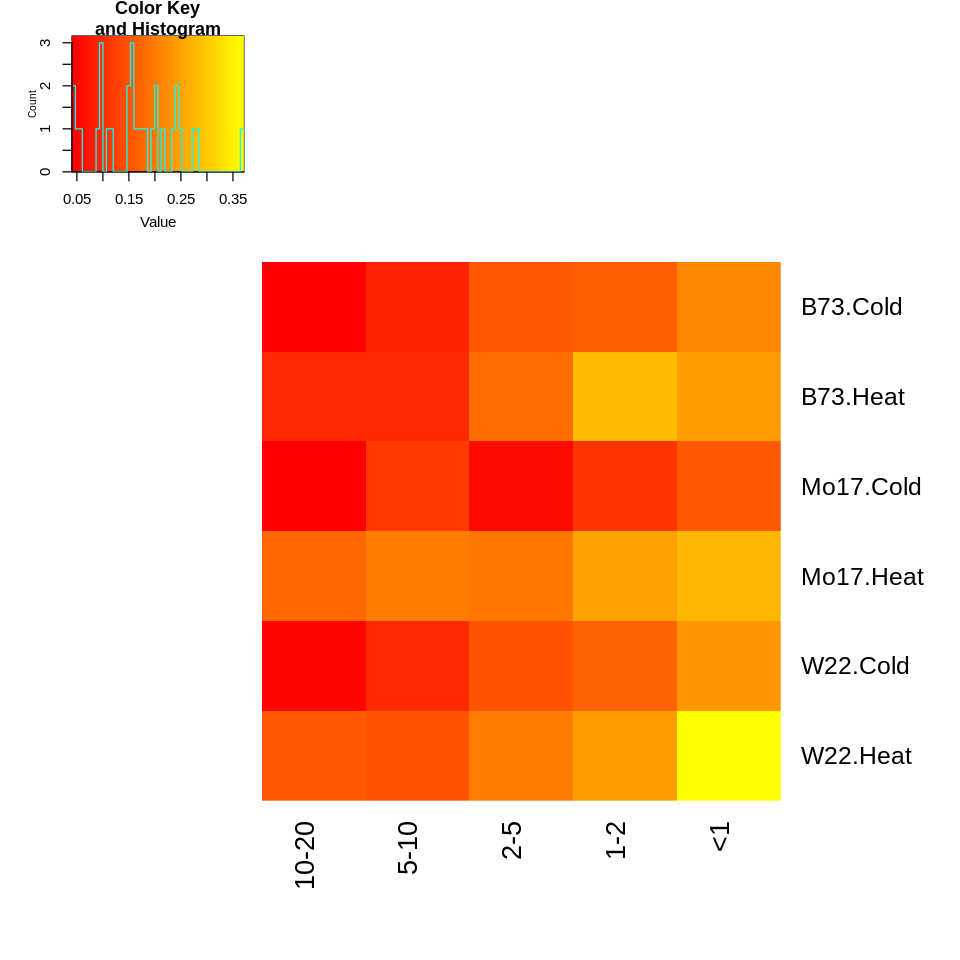

In [962]:
test = read.table("TE-gene-correlation.txt")
ntest = test %>% mutate(newname = paste(geno,treat,sep=":")) %>% 
    mutate(r2=value*value) %>% select(-geno, -treat, -value) %>% spread(newname, r2)
ntest$dist = factor(ntest$dist,
                levels = c("10-20","5-10","2-5","1-2","<1"))
head(ntest)
mtest = data.frame(rbind(ntest[3,],ntest[5,],ntest[4,],ntest[2,],ntest[1,]))
rownames(mtest) = mtest$dist
mtest = mtest[,-1] 
my_palette <- colorRampPalette(c("red","yellow"))(n = 50)
k = heatmap.2(t(as.matrix(mtest)), Rowv=FALSE, Colv = FALSE, col=my_palette,
          dendrogram="row",trace="none", margin=c(8,9))
k$rowInd

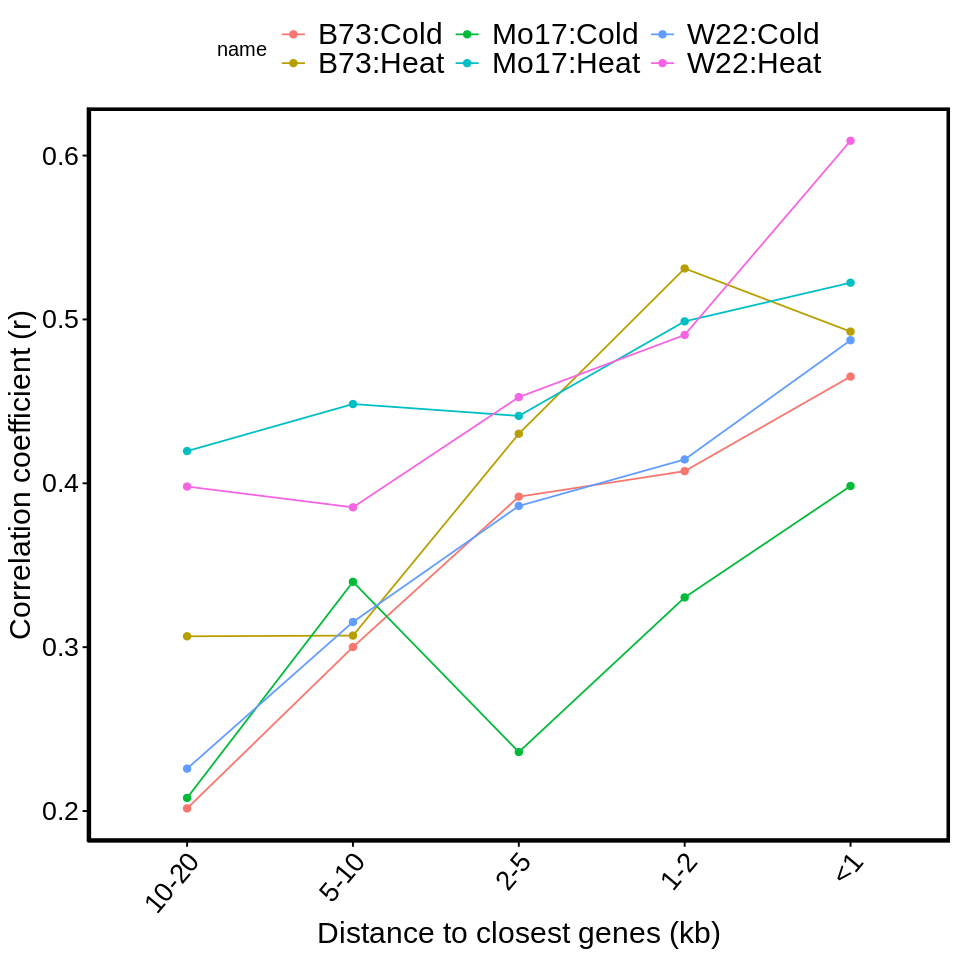

In [904]:
data1 = data %>% mutate(name = paste(geno, treat, sep=":")) %>% mutate(r2=value*value)
p = ggline(data1, "dist", "value",
   color = "name") + theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1))+ xlab("Distance to closest genes (kb)") + ylab("Correlation coefficient (r)") +
    font("xy.text", size = 16, color = "black", family="sans") +
    font("legend.text", color = "black", size=18, family="sans") +
    font("xylab", color = "black", size=18, family="sans")
#svg("TE-gene-distance-expression.svg")
p
#dev.off()
#====================End of TE and gene correlations======================================#

In [10]:
#====================Phylogenetic tree for selected gene families===========================#

library(ggtree)
require("ggrepel")
tree <- read.tree("~/Documents/scripts/RLG00357.tree")
nlist = tree$tip.label
nlist = as.data.frame(nlist)
colnames(nlist) = "phylte"
#
Bhmember = read.table("DEvalue/B73-DE-TEelement-expressed-heat.txt",sep=' ',head=T)
umr = read.table("../../../Jackie-UMR-ACR/2020newUMR-ACR/TE-withUMR-inB73.txt",head=F)
BhupTE = Bhmember %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)
BhexpTE = Bhmember %>% pull(Feature)
mydata = nlist %>% mutate(up = phylte %in% BhupTE, nonup = phylte %in% BhexpTE, umr = phylte %in% umr$V1) %>% column_to_rownames(var="phylte")
#
p = ggtree(tree, branch.length="none",size=2) + geom_tiplab(size=5) + scale_x_continuous(expand=c(0, 10))
#ggtree(tree, branch.length="none",size=2) + geom_tiplab(size=6) + scale_x_continuous(expand=c(0, 30)) + geom_label(aes(label=node)) + geom_text2(aes(subset = !isTip, label=label))
svg("RLG00357.svg",width=10,height=4)
#options(repr.plot.width=10, repr.plot.height=4)
gheatmap(p, mydata[,c(1,2,3)],offset=8,width=0.4,legend_title="genotype") + scale_fill_manual(values=c("gray","#DC0000FF"))
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [41]:
#===================paired TE elements within Family and their closest genes=====================#
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(ggpubr)
coldcan = c("DTH00163","RLC00032","RLG00007")
#coldcan = c("DTX13146","RLC00014","RLG00017") # this is actually heat
deg = read.table("DEvalue/B73-DE-Gene-expressed-cold.txt",sep=" ",head=T)
det = read.table("DEvalue/B73-DE-TEelement-expressed-cold.txt",sep=" ",head=T)
assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")
colnames(deg)[1] = "Gene"
combine = det %>% mutate(Fam = substr(Feature, 1,8)) %>% filter(Fam %in% coldcan) %>% left_join(assoc, by="Feature") %>% filter(Dist <= 10000) %>% left_join(deg, by="Gene") %>%
    drop_na() %>% select(Feature, log2FoldChange.x, Gene, log2FoldChange.y, Fam) %>% rename(TElog2FC = log2FoldChange.x , Genelog2FC = log2FoldChange.y) %>% group_by(Feature) %>%
    arrange(TElog2FC) %>% ungroup() %>% filter(!is.na(Genelog2FC)) %>%
    gather(-Feature, -Gene, -Fam, key="direction", value="log2FC") %>% mutate(newname = as.factor(log2FC))
options(repr.plot.width=12, repr.plot.height=4)
x = unique(combine$Fam)
head(combine)
mylist = list()
for (i in c(1:3)){
    mysub = combine %>% filter(Fam == x[i])
    mylevel = combine %>% filter(Fam == x[i]) %>% filter(direction=="TElog2FC")%>% pull(Feature)
    mysub$Feature = factor(mysub$Feature, levels=mylevel)
    y = ggline(mysub, "Feature", "log2FC", scales="free",x.tick = FALSE, x.tickslab = FALSE,
            color = "direction", palette = c("#00AFBB", "#E7B800"), main=x[i]) + ylab("Log2") + 
        theme(axis.text.x=element_blank(),text = element_text(size=18))
    mylist[[i]] = y
}
svg("cold-te-gene.svg",width=12,height=4)
ggarrange(mylist[[1]],mylist[[2]],mylist[[3]],nrow=1)
dev.off()
#ggline(combine, "Feature", "log2FC", facet.by = "Fam", scales="free",x.tick = FALSE, x.tickslab = FALSE,
#   color = "direction", palette = c("#00AFBB", "#E7B800")) + font("xy.text", size = 18, color = "black", family="sans") +
#    font("legend.text", color = "black", size=18, family="sans") +
#    font("xylab", color = "black", size=18, family="sans") + theme(axis.text.x=element_blank())

Feature,Gene,Fam,direction,log2FC,newname
<fct>,<fct>,<chr>,<chr>,<dbl>,<fct>
DTH00163Zm00001d00554,Zm00001d037799,DTH00163,TElog2FC,-3.961433,-3.96143263897855
DTH00163Zm00001d00933,Zm00001d021874,DTH00163,TElog2FC,-2.988566,-2.98856589332466
RLG00007Zm00001d01924,Zm00001d012791,RLG00007,TElog2FC,-2.729225,-2.72922473316095
DTH00163Zm00001d00528,Zm00001d003430,DTH00163,TElog2FC,-2.013864,-2.01386368129427
RLC00032Zm00001d00062,Zm00001d002182,RLC00032,TElog2FC,-1.835917,-1.83591705424214
RLG00007Zm00001d00885,Zm00001d043156,RLG00007,TElog2FC,-1.530623,-1.53062305385859


png 
  2

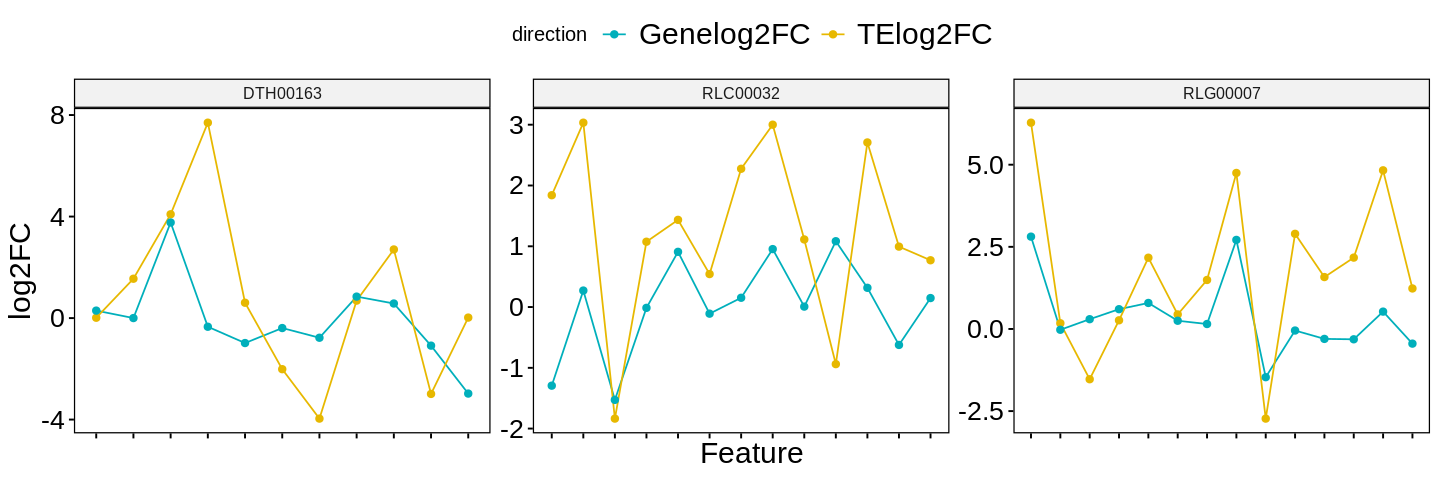

In [64]:
combine = det %>% mutate(Fam = substr(Feature, 1,8)) %>% filter(Fam %in% coldcan) %>% left_join(assoc, by="Feature") %>% filter(Dist <= 10000) %>% left_join(deg, by="Gene") %>%
    drop_na() %>% select(Feature, log2FoldChange.x, Gene, log2FoldChange.y, Fam) %>% rename(TElog2FC = log2FoldChange.x , Genelog2FC = log2FoldChange.y) %>% group_by(Feature) %>%
    arrange(TElog2FC) %>% ungroup() %>% 
    gather(-Feature, -Gene, -Fam, key="direction", value="log2FC")
options(repr.plot.width=12, repr.plot.height=4)
ggline(combine, "Feature", "log2FC", facet.by = "Fam", scales="free",x.tick = FALSE, x.tickslab = FALSE,
   color = "direction", palette = c("#00AFBB", "#E7B800")) + font("xy.text", size = 16, color = "black", family="sans") +
    font("legend.text", color = "black", size=18, family="sans") +
    font("xylab", color = "black", size=18, family="sans") + theme(axis.text.x=element_blank())

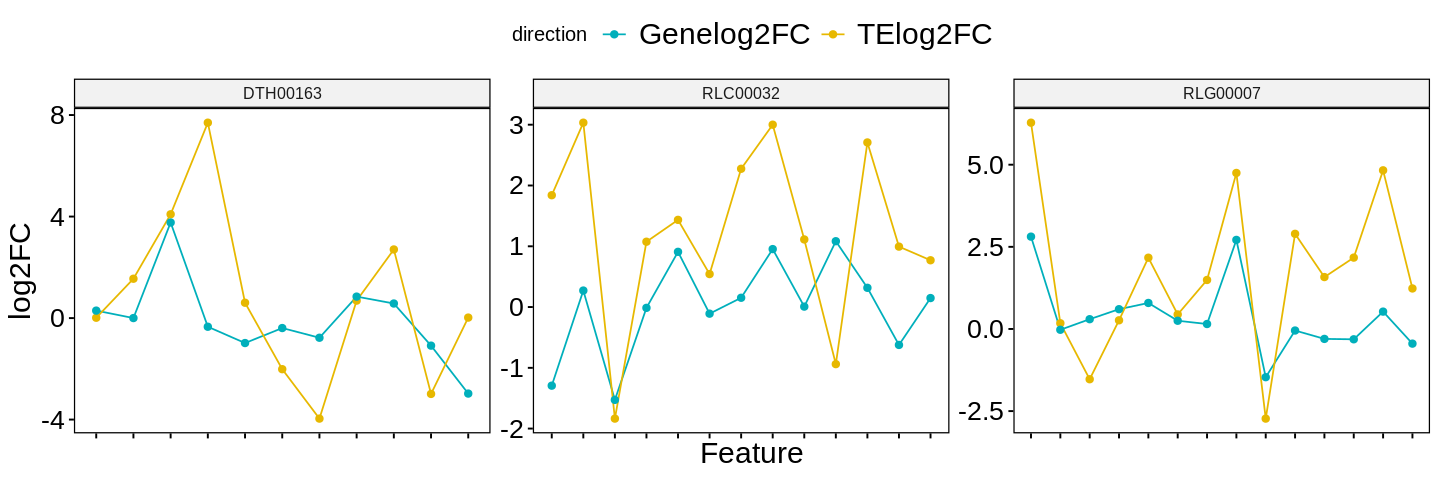

In [65]:
combine = det %>% mutate(Fam = substr(Feature, 1,8)) %>% filter(Fam %in% coldcan) %>% left_join(assoc, by="Feature") %>% filter(Dist <= 10000) %>% left_join(deg, by="Gene") %>%
    drop_na() %>% select(Feature, log2FoldChange.x, Gene, log2FoldChange.y, Fam) %>% rename(TElog2FC = log2FoldChange.x , Genelog2FC = log2FoldChange.y) %>% group_by(Feature) %>%
    arrange(TElog2FC) %>% ungroup() %>% 
    gather(-Feature, -Gene, -Fam, key="direction", value="log2FC")
options(repr.plot.width=12, repr.plot.height=4)
ggline(combine, "Feature", "log2FC", facet.by = "Fam", scales="free",x.tick = FALSE, x.tickslab = FALSE,
   color = "direction", palette = c("#00AFBB", "#E7B800")) + font("xy.text", size = 16, color = "black", family="sans") +
    font("legend.text", color = "black", size=18, family="sans") +
    font("xylab", color = "black", size=18, family="sans") + theme(axis.text.x=element_blank())

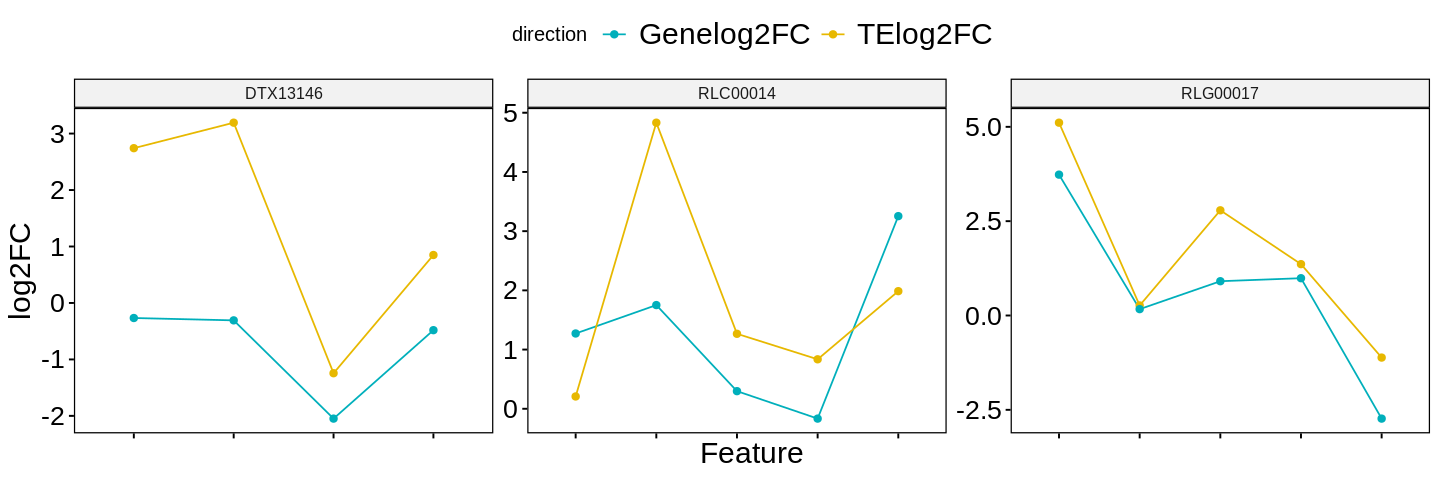

In [66]:
heatcan = c("DTX13146","RLC00014","RLG00017")
deg = read.table("DEvalue/B73-DE-Gene-expressed-heat.txt",sep=" ",head=T)
det = read.table("DEvalue/B73-DE-TEelement-expressed-heat.txt",sep=" ",head=T)
assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")
colnames(deg)[1] = "Gene"
combine = det %>% mutate(Fam = substr(Feature, 1,8)) %>% filter(Fam %in% heatcan) %>% left_join(assoc, by="Feature") %>% filter(Dist <= 10000) %>% left_join(deg, by="Gene") %>%
    select(Feature, log2FoldChange.x, Gene, log2FoldChange.y, Fam) %>% rename(TElog2FC = log2FoldChange.x , Genelog2FC = log2FoldChange.y) %>% group_by(Feature) %>%
    arrange(TElog2FC) %>% ungroup() %>% 
    gather(-Feature, -Gene, -Fam, key="direction", value="log2FC")
combine = combine[!is.na(combine$log2FC),]
options(repr.plot.width=12, repr.plot.height=4)
ggline(combine, "Feature", "log2FC", facet.by = "Fam", scales="free",x.tick = FALSE, x.tickslab = FALSE,
   color = "direction", palette = c("#00AFBB", "#E7B800")) + font("xy.text", size = 16, color = "black", family="sans") +
    font("legend.text", color = "black", size=18, family="sans") +
    font("xylab", color = "black", size=18, family="sans") + theme(axis.text.x=element_blank())

In [272]:
#=============================TE polymorphism/expression affecting gene expression=====================#
#=============================DRO gene with TE PAV=====================================================#

deg = read.table("DEvalue/B73-DE-Gene-expressed-cold.txt",sep=" ",head=T)

tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted.txt",sep="\t",head=T)
colnames(tassoc)[1] = "TE"
assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("TE","Feature","Dist")

bwg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-w22-highconfidence.txt",sep='\t',head=F)
colnames(bwg) = c("Feature","W22gene")

bmg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-mo17-highconfidence.txt",sep='\t',head=F)
colnames(bmg) = c("Feature","Mo17gene")

wdeg = read.table("DEvalue/W22-DE-Gene-expressed-cold.txt",sep=" ",head=T)
mdeg = read.table("DEvalue/Mo17-DE-Gene-expressed-cold.txt",sep=" ",head=T)
colnames(wdeg)[1] = "W22gene"
colnames(mdeg)[1] = "Mo17gene"

deg_bw = deg %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% drop_na() %>% 
        filter(Dist <= 10000) %>% left_join(tassoc, by="TE") %>% left_join(bwg, by="Feature") %>% 
        filter(!is.na(W22gene)) %>% select(-Mo17) %>% left_join(wdeg, by="W22gene") %>% group_by(Feature) %>% 
        mutate(myDist = min(Dist)) %>% ungroup() %>% filter(myDist == Dist)

deg_bm = deg %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% drop_na() %>% 
        filter(Dist <= 10000) %>% left_join(tassoc, by="TE") %>% left_join(bmg, by="Feature") %>% 
        filter(!is.na(Mo17gene)) %>% select(-W22) %>% left_join(mdeg, by="Mo17gene") %>% group_by(Feature) %>% 
        mutate(myDist = min(Dist)) %>% ungroup() %>% filter(myDist == Dist)

dim(deg_bw)
dim(deg_bm)

Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `W22gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Mo17gene` joining factors with different levels, coercing to character vector”


[1] 1621   18

[1] 1593   18

In [282]:
dim(deg_bw)
w22up = deg_bw %>% filter(log2FoldChange.y > 1, padj.y <= 0.05) %>% pull(W22gene)
wa1 = deg_bw %>% filter(log2FoldChange.y > 1, padj.y <= 0.05, is.na(W22))
wa2 = deg_bw %>% filter(log2FoldChange.y > 1, padj.y <= 0.05, !is.na(W22))
wa3 = deg_bw %>% filter(!W22gene %in% w22up, is.na(W22))
wa4 = deg_bw %>% filter(!W22gene %in% w22up, !is.na(W22))
dim(wa1)
dim(wa2)
dim(wa3)
dim(wa4)

[1] 1621   18

[1] 597  18

[1] 169  18

[1] 682  18

[1] 173  18

In [283]:
dim(deg_bm)
Mo17up = deg_bm %>% filter(log2FoldChange.y > 1, padj.y <= 0.05) %>% pull(Mo17gene)
ma1 = deg_bm %>% filter(log2FoldChange.y > 1, padj.y <= 0.05, is.na(Mo17))
ma2 = deg_bm %>% filter(log2FoldChange.y > 1, padj.y <= 0.05, !is.na(Mo17))
ma3 = deg_bm %>% filter(!Mo17gene %in% Mo17up, is.na(Mo17))
ma4 = deg_bm %>% filter(!Mo17gene %in% Mo17up, !is.na(Mo17))
dim(ma1)
dim(ma2)
dim(ma3)
dim(ma4)

[1] 1593   18

[1] 729  18

[1] 210  18

[1] 527  18

[1] 127  18

In [534]:
#=====================count TE elements per TE family=======================================#

B73coldte = read.table("DEvalue/B73-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
B73heatte = read.table("DEvalue/B73-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
B73coldteup = B73coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
B73heatteup = B73heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

W22coldte = read.table("DEvalue/W22-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
W22heatte = read.table("DEvalue/W22-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
W22coldteup = W22coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
W22heatteup = W22heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

Mo17coldte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
Mo17heatte = read.table("DEvalue/Mo17-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
Mo17coldteup = Mo17coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
Mo17heatteup = Mo17heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

Bcold = read.table("DEvalue/B73-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
Bheat = read.table("DEvalue/B73-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
Bcoldteup = B73coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
Bheatteup = B73heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

Wcold = read.table("DEvalue/W22-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
Wheat = read.table("DEvalue/W22-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
Wcoldteup = W22coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
Wheatteup = W22heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

Mcold = read.table("DEvalue/Mo17-DE-TEfamily-expressed-cold.txt",sep=' ',head=T)
Mheat = read.table("DEvalue/Mo17-DE-TEfamily-expressed-heat.txt",sep=' ',head=T)
Mcoldteup = Mo17coldte %>% filter(log2FoldChange > 1 & padj <= 0.05)
Mheatteup = Mo17heatte %>% filter(log2FoldChange > 1 & padj <= 0.05)

In [1126]:
library(dplyr)
bte = read.table("DEvalue/B73-DE-TEelement-expressed-cold.txt",sep=' ',head=T)
wte = read.table("DEvalue/W22-DE-TEelement-expressed-cold.txt",sep=' ',head=T)

wumr = read.table("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/W22-TE-withUMR-disjoined.txt",head=F)
bumr = read.table("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/B73-TE-withUMR-disjoined.txt",head=F)
mumr = read.table("~/Documents/genomeinfo/UMRdata/UMR-inTE-disjoined/Mo17-TE-withUMR-disjoined.txt",head=F)

upwte = wte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")

tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",sep="\t",head=T)
colnames(tassoc) = c("Feature","W22TE","Mo17TE")

bwg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-w22-highconfidence.txt",sep='\t',head=F)
colnames(bwg) = c("Gene","W22gene")

deg = read.table("DEvalue/B73-DE-Gene-expressed-cold.txt",sep=" ",head=T)
colnames(deg)[1] = "Gene"
updeg = deg %>% filter(log2FoldChange > 1 & padj <= 0.05)

wdeg = read.table("DEvalue/W22-DE-Gene-expressed-cold.txt",sep=" ",head=T)
colnames(wdeg)[1] = "W22gene"
upwdeg = wdeg %>% filter(log2FoldChange > 1 & padj <= 0.05)

upbte = bte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% 
        group_by(Feature) %>% mutate(tdist = min(Dist)) %>% filter(tdist == Dist) %>% ungroup() %>%
        filter(Gene %in% updeg$Gene) %>% filter(Dist <= 10000) %>%
        filter(Feature %in% tassoc$Feature) %>% left_join(bwg, by="Gene") %>% filter(!is.na(W22gene)) %>% 
        left_join(tassoc, by="Feature") %>% mutate(B73umr = ifelse(Feature %in% bumr$V1, "yes", "no"), 
                                                   W22umr = ifelse(W22TE %in% wumr$V1, "yes", "no"))

x1 = upbte %>% filter(W22gene %in% upwdeg$W22gene)
x2 = upbte %>% filter(!W22gene %in% upwdeg$W22gene)

x1 %>% filter(is.na(W22TE)) %>% nrow()
x1 %>% filter(!is.na(W22TE)) %>% nrow()
x2 %>% filter(is.na(W22TE)) %>% nrow()
x2 %>% filter(!is.na(W22TE)) %>% nrow()
x1 %>% filter(!is.na(W22TE)) %>% filter(W22TE %in% upwte) %>% nrow()
x2 %>% filter(!is.na(W22TE)) %>% filter(W22TE %in% upwte) %>% nrow()
cw22 = x2 %>% filter(is.na(W22TE))

Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”


[1] 23

[1] 4

[1] 9

[1] 5

[1] 2

[1] 2

In [1122]:
bte = read.table("DEvalue/B73-DE-TEelement-expressed-cold.txt",sep=' ',head=T)
wte = read.table("DEvalue/Mo17-DE-TEelement-expressed-cold.txt",sep=' ',head=T)

upwte = wte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")

tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",sep="\t",head=T)
colnames(tassoc) = c("Feature","W22TE","Mo17TE")

bwg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-mo17-highconfidence.txt",sep='\t',head=F)
colnames(bwg) = c("Gene","Mo17gene")

deg = read.table("DEvalue/B73-DE-Gene-expressed-cold.txt",sep=" ",head=T)
colnames(deg)[1] = "Gene"
updeg = deg %>% filter(log2FoldChange > 1 & padj <= 0.05)

wdeg = read.table("DEvalue/Mo17-DE-Gene-expressed-cold.txt",sep=" ",head=T)
colnames(wdeg)[1] = "Mo17gene"
upwdeg = wdeg %>% filter(log2FoldChange > 1 & padj <= 0.05)

upbte = bte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% 
        group_by(Feature) %>% mutate(tdist = min(Dist)) %>% filter(tdist == Dist) %>% ungroup() %>%
        filter(Gene %in% updeg$Gene) %>% filter(Dist <= 10000) %>%
        filter(Feature %in% tassoc$Feature) %>% left_join(bwg, by="Gene") %>% filter(!is.na(Mo17gene)) %>% 
        left_join(tassoc, by="Feature") %>% mutate(B73umr = ifelse(Feature %in% bumr$V1, "yes", "no"), 
                                                   Mo17umr = ifelse(Mo17TE %in% mumr$V1, "yes", "no"))

x1 = upbte %>% filter(Mo17gene %in% upwdeg$Mo17gene)
x2 = upbte %>% filter(!Mo17gene %in% upwdeg$Mo17gene)

x1 %>% filter(is.na(Mo17TE)) %>% nrow()
x1 %>% filter(!is.na(Mo17TE)) %>% nrow()
x2 %>% filter(is.na(Mo17TE)) %>% nrow()
x2 %>% filter(!is.na(Mo17TE)) %>% nrow()
x1 %>% filter(!is.na(Mo17TE)) %>% filter(Mo17TE %in% upwte) %>% nrow()
x2 %>% filter(!is.na(Mo17TE)) %>% filter(Mo17TE %in% upwte) %>% nrow()
cm17 = x2 %>% filter(is.na(Mo17TE))

Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”


[1] 22

[1] 6

[1] 12

[1] 4

[1] 2

[1] 1

In [824]:
#================testing for 25 NAM parents for these TE effects===========================#

common = intersect(cw22$Feature, cm17$Feature)
te = read.table("~/Documents/genomeinfo/TE-PAV/NAM_TE_PAV.txt",sep='\t',head=F)
dim(te)
tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted.txt",sep="\t",head=T)
head(tassoc)
#b73 = tassoc %>% filter(!is.na(W22) & !is.na(B73)) %>% pull(B73)
colnames(te) = c("Genotype","Genome","TE","PAV")
head(te)
tepav = te %>% filter(TE %in% cw22$Feature) %>% select(-Genome) %>% spread(Genotype, PAV)
check = te %>% filter(TE %in% b73, Genotype == "W22") 

assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("TE","Feature","Dist")

b73 = read.table("rn20a-cold-control-log2ratio/B73_cold_rn20a_DEgene.txt",sep=" ",head=T)
b97 = read.table("rn20a-cold-control-log2ratio/B97_cold_rn20a_DEgene.txt",sep=" ",head=T)
mo17 = read.table("rn20a-cold-control-log2ratio/Mo17_cold_rn20a_DEgene.txt",sep=' ',head=T)
ms71 = read.table("rn20a-cold-control-log2ratio/MS71_cold_rn20a_DEgene.txt",sep=' ',head=T)
oh43 = read.table("rn20a-cold-control-log2ratio/Oh43_cold_rn20a_DEgene.txt",sep=' ',head=T)
ph207 = read.table("rn20a-cold-control-log2ratio/Ph207_cold_rn20a_DEgene.txt",sep=" ",head=T)
w22 = read.table("rn20a-cold-control-log2ratio/W22_cold_rn20a_DEgene.txt",sep=" ",head=T)
colnames(b73)[1] = "Feature"
colnames(b73)[4] = "B73lg2"
colnames(b97)[1] = "Feature"
colnames(b97)[4] = "B97lg2"
colnames(mo17)[1] = "Feature"
colnames(mo17)[4] = "Mo17lg2"
colnames(ms71)[1] = "Feature"
colnames(ms71)[4] = "MS71lg2"
colnames(oh43)[1] = "Feature"
colnames(oh43)[4] = "Oh43lg2"
colnames(ph207)[1] = "Feature"
colnames(ph207)[4] = "PH207lg2"
colnames(w22)[1] = "Feature"
colnames(w22)[4] = "W22lg2"
b73 = b73[,c(1,4)]
b97 = b97[,c(1,4)]
mo17 = mo17[,c(1,4)]
ms71 = ms71[,c(1,4)]
oh43 = oh43[,c(1,4)]
ph207 = ph207[,c(1,4)]
w22 = w22[,c(1,4)]

x = tepav %>% mutate(Present = rowSums(. == "Present"), 
                                                      Absent = rowSums(. == "Absent"),
                                                     Ambiguous = rowSums(. == "ambiguous"))  %>%
    filter(Ambiguous == 0) %>% left_join(assoc, by="TE") %>% 
    left_join(b97, by="Feature") %>% left_join(mo17, by="Feature") %>%
    left_join(ms71, by="Feature") %>% left_join(oh43, by="Feature") %>% left_join(ph207, by="Feature") %>% left_join(w22, by="Feature") %>%
   # mutate(B97up = ifelse(Feature %in% b97up$Feature, "Yes", "No")) %>%
   # mutate(Mo17up = ifelse(Feature %in% mo17up$Feature, "Yes", "No")) %>%
   # mutate(MS71up = ifelse(Feature %in% ms71up$Feature, "Yes", "No")) %>%
   # mutate(Oh43up = ifelse(Feature %in% oh43up$Feature, "Yes", "No")) %>%
   # mutate(Ph207up = ifelse(Feature %in% ph207up$Feature, "Yes", "No")) %>%
   # mutate(W22up = ifelse(Feature %in% w22up$Feature, "Yes", "No")) %>%
    select(-Present, -Absent, -Ambiguous)
colnames(x)[8] = "Gene"
x

[1] 1980672       4

,B73,W22,Mo17
,<fct>,<fct>,<fct>
1,DHH00001Zm00001d00001,NA,NA
2,DHH00001Zm00001d00002,NA,NA
3,DHH00001Zm00001d00003,NA,NA
4,DHH00001Zm00001d00005,DHH00001Zm00004b10312,DHH00001Zm00014a10362
5,DHH00001Zm00001d00007,NA,NA
6,DHH00001Zm00001d00009,NA,NA


,Genotype,Genome,TE,PAV
,<fct>,<fct>,<fct>,<fct>
1,B97,B73v4,DHH00001Zm00001d00001,Present
2,B97,B73v4,DHH00001Zm00001d00002,Absent
3,B97,B73v4,DHH00001Zm00001d00003,Absent
4,B97,B73v4,DHH00001Zm00001d00005,Present
5,B97,B73v4,DHH00001Zm00001d00007,Absent
6,B97,B73v4,DHH00001Zm00001d00009,ambiguous


Warning message:
“Column `TE` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”


TE,B97,Mo17,MS71,Oh43,PH207,W22,Gene,Dist,B97lg2,Mo17lg2,MS71lg2,Oh43lg2,PH207lg2,W22lg2
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DHH00705Zm00001d00001,Present,Present,Present,Present,Present,Present,Zm00001d046942,1056,1.2677283,1.1529991,1.832055,2.2026292,1.8960216,1.4628789
DTH00160Zm00001d00117,Absent,Absent,Absent,Absent,Absent,Absent,Zm00001d018380,356,0.9922939,0.0725125,0.200628,1.1558643,-0.7188182,-0.4620476
DTH12217Zm00001d00029,Present,Present,Present,Present,Present,Present,Zm00001d053569,245,-0.1016714,-0.4042252,2.127436,0.4377342,-0.6464582,-0.1974836
DTH12326Zm00001d00062,Absent,Absent,Absent,Present,Present,Absent,Zm00001d052415,610,2.7289283,2.5324951,3.420525,2.2223924,4.0198996,2.1255309
RLG00003Zm00001d10582,Present,Present,Present,Present,Present,Present,Zm00001d019766,9420,1.1089344,1.0479345,2.613307,1.7513209,1.7548875,1.6311327
RLG00011Zm00001d01247,Absent,Absent,Absent,Absent,Absent,Absent,Zm00001d046182,326,-1.0000000,1.5711567,1.146841,0.4982509,-0.8144443,1.1085245
RLX02077Zm00001d00001,Absent,Absent,Absent,Absent,Absent,Absent,Zm00001d026273,343,0.0000000,-0.4887472,Inf,Inf,NA,-0.8132315


In [1128]:
bte = read.table("DEvalue/B73-DE-TEelement-expressed-heat.txt",sep=' ',head=T)
wte = read.table("DEvalue/W22-DE-TEelement-expressed-heat.txt",sep=' ',head=T)

upwte = wte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")

tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",sep="\t",head=T)
colnames(tassoc) = c("Feature","W22TE","Mo17TE")

bwg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-w22-highconfidence.txt",sep='\t',head=F)
colnames(bwg) = c("Gene","W22gene")

deg = read.table("DEvalue/B73-DE-Gene-expressed-heat.txt",sep=" ",head=T)
colnames(deg)[1] = "Gene"
updeg = deg %>% filter(log2FoldChange > 1 & padj <= 0.05)

wdeg = read.table("DEvalue/W22-DE-Gene-expressed-heat.txt",sep=" ",head=T)
colnames(wdeg)[1] = "W22gene"
upwdeg = wdeg %>% filter(log2FoldChange > 1 & padj <= 0.05)

upbte = bte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% 
        group_by(Feature) %>% mutate(tdist = min(Dist)) %>% filter(tdist == Dist) %>% ungroup() %>%
        filter(Gene %in% updeg$Gene) %>% filter(Dist <= 10000) %>%
        filter(Feature %in% tassoc$Feature) %>% left_join(bwg, by="Gene") %>% filter(!is.na(W22gene)) %>% 
        left_join(tassoc, by="Feature" )%>% mutate(B73umr = ifelse(Feature %in% bumr$V1, "yes", "no"), 
                                                   W22umr = ifelse(W22TE %in% wumr$V1, "yes", "no"))

x1 = upbte %>% filter(W22gene %in% upwdeg$W22gene)
x2 = upbte %>% filter(!W22gene %in% upwdeg$W22gene)

x1 %>% filter(is.na(W22TE)) %>% nrow()
x1 %>% filter(!is.na(W22TE)) %>% nrow()
x2 %>% filter(is.na(W22TE)) %>% nrow()
x2 %>% filter(!is.na(W22TE)) %>% nrow()
x1 %>% filter(!is.na(W22TE)) %>% filter(W22TE %in% upwte) %>% nrow()
x2 %>% filter(!is.na(W22TE)) %>% filter(W22TE %in% upwte) %>% nrow()

Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”


[1] 31

[1] 20

[1] 21

[1] 7

[1] 15

[1] 3

In [1130]:
bte = read.table("DEvalue/B73-DE-TEelement-expressed-heat.txt",sep=' ',head=T)
wte = read.table("DEvalue/Mo17-DE-TEelement-expressed-heat.txt",sep=' ',head=T)

upwte = wte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% pull(Feature)

assoc = read.table("~/Documents/genomeinfo/TE-original-annotation/TE-to-cloestgene-nooverlap/B73-closest-fulllength-TE-gene-result.txt",sep=' ',head=F)
colnames(assoc) = c("Feature","Gene","Dist")

tassoc = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/B73W22Mo17-TEelement-zlconverted-highconfidence.txt",sep="\t",head=T)
colnames(tassoc) = c("Feature","W22TE","Mo17TE")

bwg = read.table("~/Documents/genomeinfo/Gene-TE-family-element-association-files/highconfidence-genelist/b73-mo17-highconfidence.txt",sep='\t',head=F)
colnames(bwg) = c("Gene","Mo17gene")

deg = read.table("DEvalue/B73-DE-Gene-expressed-heat.txt",sep=" ",head=T)
colnames(deg)[1] = "Gene"
updeg = deg %>% filter(log2FoldChange > 1 & padj <= 0.05)

wdeg = read.table("DEvalue/Mo17-DE-Gene-expressed-heat.txt",sep=" ",head=T)
colnames(wdeg)[1] = "Mo17gene"
upwdeg = wdeg %>% filter(log2FoldChange > 1 & padj <= 0.05)

upbte = bte %>% filter(log2FoldChange > 1 & padj <= 0.05) %>% left_join(assoc, by="Feature") %>% 
        group_by(Feature) %>% mutate(tdist = min(Dist)) %>% filter(tdist == Dist) %>% ungroup() %>%
        filter(Gene %in% updeg$Gene) %>% filter(Dist <= 10000) %>%
        filter(Feature %in% tassoc$Feature) %>% left_join(bwg, by="Gene") %>% filter(!is.na(Mo17gene)) %>% 
        left_join(tassoc, by="Feature") %>% mutate(B73umr = ifelse(Feature %in% bumr$V1, "yes", "no"), 
                                                   Mo17umr = ifelse(Mo17TE %in% mumr$V1, "yes", "no"))

x1 = upbte %>% filter(Mo17gene %in% upwdeg$Mo17gene)
x2 = upbte %>% filter(!Mo17gene %in% upwdeg$Mo17gene)

x1 %>% filter(is.na(Mo17TE)) %>% nrow()
x1 %>% filter(!is.na(Mo17TE)) %>% nrow()
x2 %>% filter(is.na(Mo17TE)) %>% nrow()
x2 %>% filter(!is.na(Mo17TE)) %>% nrow()
x1 %>% filter(!is.na(Mo17TE)) %>% filter(Mo17TE %in% upwte) %>% nrow()
x2 %>% filter(!is.na(Mo17TE)) %>% filter(Mo17TE %in% upwte) %>% nrow()

Warning message:
“Column `Feature` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Gene` joining factors with different levels, coercing to character vector”
Warning message:
“Column `Feature` joining character vector and factor, coercing into character vector”


[1] 28

[1] 24

[1] 20

[1] 1

[1] 15

[1] 0

In [28]:
# UMR plot

# #4DBBD5FF cold
# #B09C85FF control
# #E64B35FF heat
datax = read.table("B73-UMR-TE-heat-specific-Aug.txt",sep='\t',head=T,check.names=F)
data = datax
data1 = colMeans(x=data, na.rm = TRUE)
data1 = data.frame(data1)
colnames(data1) = c("Expressed")

nfdata = data1 %>% rownames_to_column(var="Position") %>% gather("Condition","NormReadCounts",-Position)
nfdata$Position = factor(nfdata$Position, levels=c("-1000","-900","-800","-700","-600","-500","-400","-300","-200","-100","UMR",
        "100","200","300","400","500","600","700","800","900","1000"))

options(repr.plot.width=8, repr.plot.height=6)
svg("B73-UMR-heat-specific.svg",width=8,height=6)
ggplot(data=nfdata, aes(x=Position, y=NormReadCounts, group=Condition, color=Condition))+
  geom_line(size=2) + theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),text = element_text(size=22),
       axis.text.x = element_text(angle = 50, hjust=1), panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ xlab("UMR and nearby regions (bp) in expressed TE elements") + 
ylab("Normalized Read Counts") +scale_color_manual(values=c('#E64B35FF','#B09C85FF','#4DBBD5FF'))
dev.off()

png 
  2

[1] "#E64B35" "#EC7867" "#F2A49A" "#F8D2CC" "#FFFFFF"

png 
  2

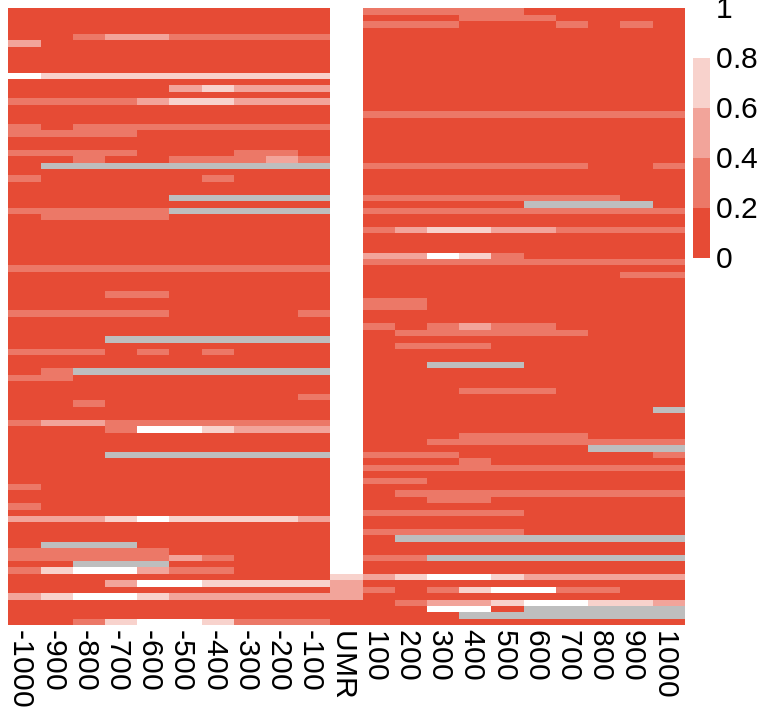

In [29]:
matrix = read.table("B73-UMR-TE-heat-specific-Aug.txt",sep='\t',head=T,check.names = F)
mymatrix = matrix
my_palette = colorRampPalette(colors = c('#E64B35FF', "white"))(n=5)
my_palette
new = mymatrix %>% mutate(mymean = rowMeans(.)) %>% arrange(desc(UMR))
options(repr.plot.width=6.5, repr.plot.height=6)
save_pheatmap_pdf <- function(x, filename, width=6.5, height=6) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   tiff(filename, units = "in", width=6.5, height=6, res=300, compression = 'lzw')
#   svg(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
xx = pheatmap(as.matrix(new[,-ncol(new)]),cluster_rows = F,cluster_cols = F,na_col="gray",fontsize = 18,
        color = my_palette,border=FALSE)
save_pheatmap_pdf(xx, "B73-UMR-heat-specific-heatmap.tiff")


region,umr,value,prop
<fct>,<fct>,<dbl>,<dbl>
Non-expressed,withUMR,14217,0.04
Non-expressed,withoutUMR,322517,0.96
Expressed,withUMR,915,0.61
Expressed,withoutUMR,575,0.39
Cold specific,withUMR,7,0.19
Cold specific,withoutUMR,29,0.81
Heat specific,withUMR,76,0.43
Heat specific,withoutUMR,101,0.57


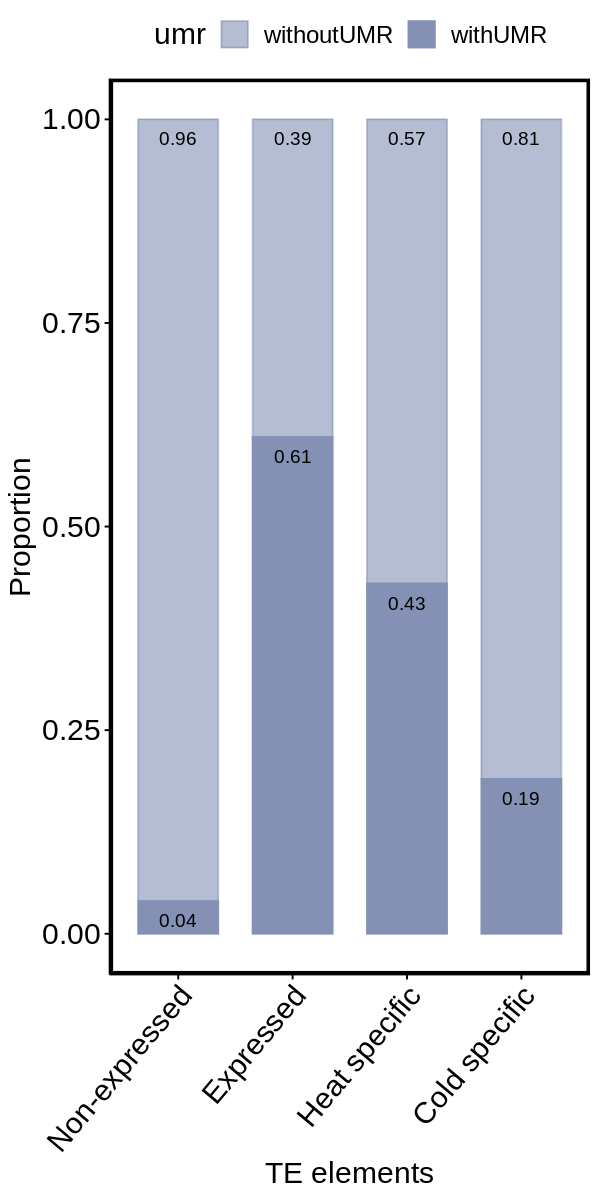

In [31]:
options(repr.plot.width=5, repr.plot.height=10)
value <- c(14217,322517,915,575,7,29,76,101)
region <- c("Non-expressed","Non-expressed","Expressed","Expressed",
            "Cold specific","Cold specific","Heat specific","Heat specific")
umr <- c("withUMR","withoutUMR","withUMR","withoutUMR","withUMR","withoutUMR","withUMR","withoutUMR")
data1 = data.frame(region, umr, value)
data1$region = factor(data1$region, levels=c("Non-expressed","Expressed","Heat specific",
            "Cold specific"))
data2 = data1 %>% group_by(region) %>% mutate(prop=round(value/sum(value),2)) %>% ungroup()
data2
#svg("UMR-expression-proportion.svg",width=5,height=10)
ggbarplot(data2, "region", "prop",
  fill = "umr", color = "umr", palette = c("#8491B499","#8491B4FF"),
  label = TRUE, lab.pos = "in") +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 2, linetype = "solid"),
       axis.text.x = element_text(angle = 50, hjust=1),text = element_text(size=18),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ylab("Proportion")+xlab("TE elements")
#dev.off()